In [ ]:
!pip install sentencepiece # run this cell, then restart the runtime

     |████████████████████████████████| 1.2MB 6.9MB/s 


In [ ]:
!pip install datasets
!pip install sacrerouge sacrebleu bert-score

!git clone https://github.com/huggingface/transformers.git
!pip install ./transformers/.

     |████████████████████████████████| 194kB 6.7MB/s 
     |████████████████████████████████| 112kB 21.3MB/s 
     |████████████████████████████████| 245kB 17.3MB/s 
     |████████████████████████████████| 327kB 6.3MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
     |████████████████████████████████| 61kB 4.9MB/s 
     |████████████████████████████████| 10.4MB 6.6MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 27.4MB 125kB/s 
     |████████████████████████████████| 2.0MB 35.6MB/s 
     |████████████████████████████████| 1.1MB 37.1MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 3.2MB 35.0MB/s 
     |████████████████████████████████| 870kB 29.0MB/s 
  Created wheel for overrides: filename=overrides-3.1.0-cp37-none-any.whl size=10174 sha256=be57bbdf3cc3aa8a883dfe8a20d1aa383c79e0f621774a8731980769fbd2d339
  Stored in directory: /root/.cache/pip/wheels/5c/24/13/6ef8600e6f147

## Xtreme Abstractive summarization 

[More details on the dataset](https://huggingface.co/datasets/xsum)

In [ ]:
from datasets import load_dataset

# loading dataset
train_dataset = load_dataset('xsum', split='train')
valid_dataset = load_dataset('xsum', split='validation')
test_dataset = load_dataset('xsum', split='test')

# in this example we will use only one batch containing 10 examples 
batch_input = test_dataset["document"][0:10]
batch_output = test_dataset["summary"][0:10]

Using custom data configuration default


Using custom data configuration default
Reusing dataset xsum (/root/.cache/huggingface/datasets/xsum/default/1.2.0/f9abaabb5e2b2a1e765c25417264722d31877b34ec34b437c53242f6e5c30d6d)
Using custom data configuration default


Dataset xsum downloaded and prepared to /root/.cache/huggingface/datasets/xsum/default/1.2.0/f9abaabb5e2b2a1e765c25417264722d31877b34ec34b437c53242f6e5c30d6d. Subsequent calls will reuse this data.


Reusing dataset xsum (/root/.cache/huggingface/datasets/xsum/default/1.2.0/f9abaabb5e2b2a1e765c25417264722d31877b34ec34b437c53242f6e5c30d6d)


# Model 

**BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension [Paper](https://arxiv.org/abs/1910.13461) | [usage](https://huggingface.co/transformers/model_doc/bart.html) | [Model card](https://huggingface.co/facebook/bart-large)**

The Bart model was proposed in BART: Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension by Mike Lewis, Yinhan Liu, Naman Goyal, Marjan Ghazvininejad, Abdelrahman Mohamed, Omer Levy, Ves Stoyanov and Luke Zettlemoyer.

Normally BART would need to be finetuned for XSUM to be able to run on this task for this we will use `distilbart-xsum-6-6` a smaller version of bart that is finetuned already on the Xsum dataset. 


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig

# Each model has a name on the hugging face website: you can search through the list of all models here https://huggingface.co/models
model = BartForConditionalGeneration.from_pretrained("sshleifer/distilbart-xsum-6-6")
# usually each model has a special tokenizer these tokenizers contain the vocabulary dictionary of all the tokens you should find the one that works with the model you use
# usually they have the same name but for the model "sshleifer/distilbart-xsum-6-6" which is made by the community we know that it is an adaptation of BART model so 
# it works with the BART tokenizer.
tok = BartTokenizer.from_pretrained("facebook/bart-base")  ## tokenizer

In [ ]:
# using our loaded tokenizer: we will encode the input documents into 
# max_length is 1024 as the bart model allows to accept 1024 tokens max as an input 
input_encodings = tok.batch_encode_plus(batch_input, padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(batch_output, padding=True, max_length=1024, truncation=True, return_tensors="pt")

In [ ]:
# move our model and batch to the gpu
# comment the line below if you don't need a gpu (will be slower though)
#model.to("cuda")
#input_encodings.to("cuda")

In [ ]:
# Given the batch Decode the answer from your model note that model.generate function takes many params, it will operate as greedy decoding if none is given. 
model_output = model.generate(input_encodings["input_ids"])

In [ ]:
## converting model output into text (this is called tokenizer "decoding") (not to confuse with decoding algorithms like sampling and beam search these have the function model.generate)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(batch_input, batch_output, model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(s[0:1000],t,g))

source:	 Fast forward about 20 years, and it's fair to say he has done just that.
The business he runs, Frasers Hospitality, is one of the world's biggest providers of high-end serviced apartments. Its 148 properties span about 80 capital cities, as well as financial hubs across Europe, Asia, the Middle East and Africa.
But it almost didn't get off the ground.
When Mr Choe was appointed to launch and lead the company, Asia was booming; the tiger economies of Hong Kong, South Korea, Taiwan and Singapore were expanding rapidly.
But as Frasers prepared to open its first two properties in Singapore, the Asian financial crisis hit.
It was 1997. Currencies went into freefall. Suddenly, people were losing their jobs and stopped travelling.
Mr Choe recalls asking staff if they really wanted to continue working with the firm, because when the properties opened they might not get paid.
"It was really that serious," he says. "I remember tearing up because they said 'let's open it, let's open it w

## 1.1) Showing some examples of input/model output/target

In [ ]:
input_encodings = tok.batch_encode_plus(valid_dataset["document"][0:10], padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(valid_dataset['summary'][0:10], padding=True, max_length=1024, truncation=True, return_tensors="pt")

model.to("cuda")
input_encodings.to("cuda")

model_output = model.generate(input_encodings["input_ids"])

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(batch_input, batch_output, model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(s[0:1000],t,g))

source:	 Fast forward about 20 years, and it's fair to say he has done just that.
The business he runs, Frasers Hospitality, is one of the world's biggest providers of high-end serviced apartments. Its 148 properties span about 80 capital cities, as well as financial hubs across Europe, Asia, the Middle East and Africa.
But it almost didn't get off the ground.
When Mr Choe was appointed to launch and lead the company, Asia was booming; the tiger economies of Hong Kong, South Korea, Taiwan and Singapore were expanding rapidly.
But as Frasers prepared to open its first two properties in Singapore, the Asian financial crisis hit.
It was 1997. Currencies went into freefall. Suddenly, people were losing their jobs and stopped travelling.
Mr Choe recalls asking staff if they really wanted to continue working with the firm, because when the properties opened they might not get paid.
"It was really that serious," he says. "I remember tearing up because they said 'let's open it, let's open it w

# Evaluations 

In [ ]:
import bert_score
import sacrebleu
import pandas as pd 

percision,recall,fscore = bert_score.score(cands=model_output_decoded, refs=batch_output, lang="en")
bleu = sacrebleu.corpus_bleu(model_output_decoded, [batch_output]).score


df = pd.DataFrame({
    "BLEU":bleu,
    "BERTSCORE-percision": [float(percision.mean())],
    "BERTSCORE-recall": [float(recall.mean())],
    "BERTSCORE-fscore": [float(fscore.mean())]
    })

df

,BLEU,BERTSCORE-percision,BERTSCORE-recall,BERTSCORE-fscore
0,0.745347,0.849557,0.845635,0.84753


# Exercise 3

Welcome to your last exercise in this learning journey :). 
We provide you with a notebook containing an example on how to load a pretrained model inside the hugging face library and use it for generation tasks, we would like to ask you to do the same using other models and evaluate on other datasets. 

In particular, in this excercise you will be a master in loading Pretrained models (like T5), writing your own decoding algorithms, as well as investigating what is happening under the hood by interpreting their decisions. You will be (almost) an expert on three tasks Machine Translation, Summarization and Question Answering. 

The notebook contains some examples showing some guiding examples based on BART model. This model is a pretrained one that needs finetuning on the target task to perform well. The cool thing about T5 that it is trained jointly on many tasks both supervised and unsupervised such as LM, translation, summarization and question answering by reforming all tasks as "text" to "text". "For example, automatic summarization is done by feeding in a document
followed by the text “Summarize:” and then the summary is predicted via autoregressive decoding." In this excercise you will have to append those tokens yourself in the input to the model to be able to use it as a summarization model. 

-----

# TASK1: 

## 1.1 Use T5 model on new tasks and dataset
 
### T5 

 - Note: For this exercise you would need to get last dev version (`4.4.0.dev0`) of transformers from github
 
 ```
 git clone https://github.com/huggingface/transformers.git
 %cd transformers
 pip install .
```
 - You will use `t5-small` pretrained model from Hugging Face: https://huggingface.co/t5-small

 - The documentation of T5 class can be found here: https://huggingface.co/transformers/model_doc/t5.html
 
 To know more about T5 model: 
  - Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer (https://arxiv.org/pdf/1910.10683.pdf)
  - Stanford guest lecture about T5: http://web.stanford.edu/class/cs224n/slides/cs224n-2021-lecture14-t5.pdf

### New Tasks & Datasets   
- Translation: `bible_para` (https://huggingface.co/datasets/bible_para), `ted_talks_iwslt` (https://huggingface.co/datasets/ted_talks_iwslt) 
- Summarization : `cnn-dailymail` (https://huggingface.co/datasets/cnn_dailymail) 
- Question answering: BoolQ dataset (https://huggingface.co/datasets/boolq)


**Note:** `t5-small` can not handle sequences longer than 512 max_length; you would need to preprocess your datasets accordingly as done above in the tokenizer.

For each task you should give a certain prefix augemented to the input (e.g. "translate English to German: " to be able to translate an english input to german) to know each task prefix consider looking into the config https://huggingface.co/t5-small/blob/main/config.json . 


### Deliverable 1.1  (1 pt)
**OUTPUT:** print some examples from the test/validation split of each task showing the input/model output/ target reference.

## 1.2 - Implement Extra evaluation Metrics

- Summarizaiton: ROUGE (https://www.aclweb.org/anthology/W04-1013.pdf)
- MT: BLEU (https://www.aclweb.org/anthology/P02-1040/)
- Question Answering : exact match and macro-F1 (https://arxiv.org/pdf/1606.05250.pdf) 
- For those you will need a tokenizer you can use an existing implementation of the [MOSES tokenizer](https://pypi.org/project/mosestokenizer/) 
### Deliverable 1.2 (2 pt)
 - implement evaluation metrics : BLEU, ROUGE
 - Select ~1000 sentences from each of the datasets (use `test` when available, or `validation` split otherwise)
 - **Table1**: Evaluate your model on those Metrics
 - **Table2**: As a sanity check of your implementation use already existing implementation online of those metrics and compare them together with your implementation. 

## 1.3- Implement Decoding methods your own
Now you are not allowed to use the existing implementation of the function `model.generate`. [Read here about different usages of this function including many decoding algorithms beam, sampling, top-k and nucleus sampling](https://huggingface.co/blog/how-to-generate)

- **Implement a beam search** generation function that takes beamsize as a function parameter. 
- **Implement a Nucleus sampling** function that samples from a model using Nucleus sampling taking top-p as a function parameter. 
- **Implement Softmax with Temperature** function that samples from a model using Sampling with Temperature taking temperature(t) as a function parameter. 

### Deliverable 1.3 (8pt)

- **Table1:** Check Correctness of your implementation, in a table show a comparison between results obtained from model.generate function and your implementation for different beam-sizes for beamsearch and top-p 

- **Table2:** Compare between different decoding methods. for summarization and machine translation and question answering try different decoding methods for example try changing the top-p value in the nucleus sampling algorithm the temperature of the softmax and with the beamsize in the beam search (for this only you are allowed to use model.generate and existing implementation of evaluation metrics
- **Short Report 300 words max:** Given the results you obtained above. Write a short report containing your conclusions on which are the best decoding algorithm / parameter for each task. Why do you think they are the best? Does increasing the beam size usually give better scores? Why or Why not?

---------------

# Task 2 Attention Visualization 

The goal of this exercise is to understand whether (and how) the attention can be used to interpret model's behaviour. 

## 2.1 Implement cross-attention matrix vizualization
Select several examples for each task and manually examine the attention patterns for each of those tasks. What are your observations? Is there any difference in attention patterns; is there any common patterns? 

### Deliverable 2.1 (3 pt)
**Plots:** You are expected to output plots similar to those in [this blogpost](https://nlp.seas.harvard.edu/2018/04/03/attention.html)
(section attention visualization). 

We expect you to visualize at least three plots showing any of the following
- Vizualize attention matrices per each head and each layer
- Try to aggregate the attention values across heads/layers.
- Consider examples from different categories that would take into account: model performance (hard vs easy examples), input length, different task.

**Short report max 300 words:** Add below each of the attention values above. Your comments Highlighting those patterns and what do you observe: eg. common or different patterns across tasks, how those patterns change across layers, individual attention heads versus aggregated attention patterns, any other observations. 

## 2.2 Implement Attention Matrix Aggregation
Manual examination allows to get an intuition of what attention patterns are. Aggregation metrics allow to make corpus-wide conclusions about the roles of different attention heads. Check (this paper)[https://www.aclweb.org/anthology/P19-1580/]  for more details. Implement one of the "aggregation" metrics proposed in that paper : confidence score or LRP. Compare the attention patterns across the tasks.  

### Deliverable 2.2  (4 pt) 
- **Plots and short report:** Implement one of these methods for Attention aggregation (Condifence score or LRP) and plot 3 plots showing some of the aspects above  



----------------------------------


# Bonus 1 (experiment with finetuning)
 - Take any available model on Hugging face which was trained/fine-tuned specifically for the above mentioned tasks (translation, summarization, question answering)
 - Perform task 1 and task 2 with those task-adapted models; Compare it to T5 performance/behaviour.  


## Deliverable Bonus 1 (3pt)
- **Table:** On a single task compare task 1 and 2 using several evaluation metrics and interpretability measures from the above (you can use existing implementation for those metrics). 
- **Short report 300 words max** : comment on What is common and different between these models in terms of interpretability and evaluation metrics? Does the finetuned model perform better than T5 model who was trained on all tasks together? Why would you use one instead of the other? 


# Bonus 2 (implement Minimum Bayes Risk Decoding)
Neural Language Generation models are silly what they believe the highest likely sequence is usually an empty sequence (`<s></s>`) This problem is demonstrated in the following paper: [On NMT Search Errors and Model Errors: Cat Got Your Tongue?](https://www.aclweb.org/anthology/D19-1331/).

This problem is puzzling many scientists at the moment. A method to overcome is to sample many output of the model and rank them according to their pairwise utility. This is a tracktable approximation of a method called Minimum bayes risk decoding. That has been recently proposed in this recent work [Is MAP Decoding All You Need? The Inadequacy of the Mode in Neural Machine Translation](https://arxiv.org/pdf/2005.10283.pdf).
<img src=https://i.imgur.com/J0ePay7.png width=500>

In this bonus task we ask you to implement this decoding method as the two one above (you can use any utility function of your choice in the paper they use METEOR python implementation is available online e.g. here https://pypi.org/project/textmetrics/).

## Deliverable Bonus 2 (5pt):
- **Table:** Compare MBR decoding vs Beam search with beam size=5, beam size=10, beam size=15 other on machine translation task above.  
- **Short Report 300 words max:** Given the results you obtained above. Write a short report containing your conclusions. What on which are the best decoding algorithm / parameter for each task. Why is that? what are your conclusions?  

------------------

# Summary of All Deliverables
Overall you have Two tasks with 8 deliverables with 3 optional ones: 
- Deliverable 1.1  (1 pt) 
- Deliverable 1.2 (2 pt)
- Deliverable 1.3 (8pt)
- Deliverable 2.1 (3 pt)
- Deliverable 2.2  (4 pt) 
- Deliverable Bonus 1 (3pt)
- Deliverable Bonus 2 (5pt):

# Submit your Exercise

- All deliverables are expected to be submitted in a single colab notebook. 
- In your notebook please highlight each deliverable by its title (e.g. # Deliverable 1.2)..etc
- Please stick to the format of each deliverable being a table short report or a plot as identified above 
- Please name your notebook  on the following format  DSBA_EXCERCISE3_FIRSTNAME_LASTNAME
(where firstname and lastname are those of the one who will submit the exercise on behalf of the team)

Submit your excercise by filling the following form (one submission per team): https://forms.gle/nqkcUw3v6oLxHEQJ6


In [ ]:
!git clone https://github.com/huggingface/transformers.git
%cd transformers
!pip install .

fatal: destination path 'transformers' already exists and is not an empty directory.
/content/transformers
Processing /content/transformers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for transformers: filename=transformers-4.5.0.dev0-cp37-none-any.whl size=2059073 sha256=a1b6d2ca5ba823ff5a09cb39a40cd8ec9a5a51e943f2acdb1242c0b83578f37b
  Stored in directory: /tmp/pip-ephem-wheel-cache-9nmqkp4v/wheels/23/19/dd/2561a4e47240cf6b307729d58e56f8077dd0c698f5992216cf
Successfully built transformers
  Found existing installation: transformers 4.5.0.dev0
    Uninstalling transformers-4.5.0.dev0:
      Successfully uninstalled transformers-4.5.0.dev0


# 1.1) Some input/model output/target

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
import sentencepiece

## 1.1.1) Summarize

In [ ]:
tok = T5Tokenizer.from_pretrained("t5-base")
model_sum = T5ForConditionalGeneration.from_pretrained('t5-small',)

In [ ]:
from datasets import load_dataset

train_sum = load_dataset("cnn_dailymail", '3.0.0',split='train')
val_sum = load_dataset("cnn_dailymail", '3.0.0',split='validation')
test_sum = load_dataset("cnn_dailymail", '3.0.0',split='test')

NotADirectoryError: ignored

In [ ]:
inputs_sum=[]
labels_sum=[]
for x in test_sum:
  inputs_sum.append("summarize: " + x['article'])
  labels_sum.append(x['highlights'])

In [ ]:
input_encodings_sum = tok.batch_encode_plus(inputs_sum[0:10], padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings_sum = tok.batch_encode_plus(labels_sum[0:10], padding=True, max_length=1024, truncation=True, return_tensors="pt")

model_output = model_sum.generate(input_encodings_sum["input_ids"],max_length=1000)

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(inputs_sum[0:10],labels_sum[0:10], model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n".format(s[0:1000],t,g))


## 1.1.2) Translation

In [ ]:
from datasets import load_dataset

data_bible = load_dataset("bible_para", 'en-fr', split='train')
train_dataset = data_bible[0:int(0.8*len(data_bible))]
valid_dataset = data_bible[int(0.6*len(data_bible)):int(0.8*len(data_bible))]
test_dataset = data_bible[int(0.8*len(data_bible)):len(data_bible)]

Dataset bible_para downloaded and prepared to /root/.cache/huggingface/datasets/bible_para/en-fr/1.0.0/b6cc20bcbfb0299beeba1dcc80a8420b975938ca0eef75b3ed30b50df7d950b1. Subsequent calls will reuse this data.


In [ ]:
tok = T5Tokenizer.from_pretrained("t5-base")
model_transl = T5ForConditionalGeneration.from_pretrained('t5-base')

In [ ]:
inputs_transl=[]
labels_transl=[]
for x in test_dataset['translation']:
  inputs_transl.append('translate English to French: ' + x['en'])
  labels_transl.append(x['fr'])
  

In [ ]:
input_encodings_transl = tok.batch_encode_plus(inputs_transl[0:10], padding=True, max_length=512, truncation=True, return_tensors="pt")
target_encodings_transl = tok.batch_encode_plus(labels_transl[0:10], padding=True, max_length=512, truncation=True, return_tensors="pt")

model_output = model_transl.generate(input_encodings_transl["input_ids"],max_length= 700)


model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(inputs_transl[0:20], labels_transl[0:20], model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(s[0:1000],t,g))

source:	 translate English to French: Thus saith the LORD, Where is the bill of your mother's divorcement, whom I have put away? or which of my creditors is it to whom I have sold you? Behold, for your iniquities have ye sold yourselves, and for your transgressions is your mother put away.
target:	Ainsi parle l`Éternel: Où est la lettre de divorce par laquelle j`ai répudié votre mère? Ou bien, auquel de mes créanciers vous ai-je vendus? Voici, c`est à cause de vos iniquités que vous avez été vendus, Et c`est à cause de vos péchés que votre mère a été répudiée.
generated	Ainsi dit l'Éternel, Où est le compte de divorce de votre mère, que j'ai mis à l'abri, ou quel de mes créanciers est-il à qui je vous ai vendu? Voici, car vos iniquités vous avez vendues, et pour vos transgressions, votre mère a été mise à l'abri.
------

source:	 translate English to French: Wherfore, when I came, was there no man? when I called, was there none to answer? Is my hand shortened at all, that it cannot red

## 1.1.3) Q&A

In [ ]:
dataset_qa = load_dataset("boolq")

Using custom data configuration default


Dataset boolq downloaded and prepared to /root/.cache/huggingface/datasets/boolq/default/0.1.0/1fcfdc6f36dc89a2245ffbbd5248ab33890594b50396731ebc78411bdd2ca534. Subsequent calls will reuse this data.


In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
model_qa = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-small-finetuned-boolq")
tok_qa = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-boolq")

The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


In [ ]:
inputs_qa=[]
labels_qa=[]
compteur = 0
for x in dataset_qa['validation']:
  if compteur < 20:
    inputs_qa.append('question: ' + x['question'] + ' context: ' + x["passage"])
    
    labels_qa.append(str(x['answer']))
  
  compteur+=1


In [ ]:
input_encodings_qa = tok.batch_encode_plus(inputs_qa, padding=True, max_length=512, truncation=True, return_tensors="pt")
target_encodings_qa = tok.batch_encode_plus(labels_qa, padding=True, max_length=512, truncation=True, return_tensors="pt")

model_output = model_qa.generate(input_encodings_qa["input_ids"],max_length=10)

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
model_output_decoded_bool = [True if x=='yes' else False for x in model_output_decoded]

for s,t,g in zip(inputs_qa, labels_qa, model_output_decoded_bool):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(s[0:1000],t,g))

source:	 question: does ethanol take more energy make that produces context: All biomass goes through at least some of these steps: it needs to be grown, collected, dried, fermented, distilled, and burned. All of these steps require resources and an infrastructure. The total amount of energy input into the process compared to the energy released by burning the resulting ethanol fuel is known as the energy balance (or ``energy returned on energy invested''). Figures compiled in a 2007 report by National Geographic Magazine point to modest results for corn ethanol produced in the US: one unit of fossil-fuel energy is required to create 1.3 energy units from the resulting ethanol. The energy balance for sugarcane ethanol produced in Brazil is more favorable, with one unit of fossil-fuel energy required to create 8 from the ethanol. Energy balance estimates are not easily produced, thus numerous such reports have been generated that are contradictory. For instance, a separate survey report

# 1.2 - Implement Extra evaluation Metrics

- Summarizaiton: ROUGE (https://www.aclweb.org/anthology/W04-1013.pdf)
- MT: BLEU (https://www.aclweb.org/anthology/P02-1040/)
- Question Answering : exact match and macro-F1 (https://arxiv.org/pdf/1606.05250.pdf) 
- For those you will need a tokenizer you can use an existing implementation of the [MOSES tokenizer](https://pypi.org/project/mosestokenizer/) 
### Deliverable 1.2 (2 pt)
 - implement evaluation metrics : BLEU, ROUGE
 - Select ~1000 sentences from each of the datasets (use `test` when available, or `validation` split otherwise)
 - **Table1**: Evaluate your model on those Metrics
 - **Table2**: As a sanity check of your implementation use already existing implementation online of those metrics and compare them together with your implementation. 


In [ ]:
!pip install rouge
from rouge import Rouge
score = Rouge()
score 

### 1.2.1) Rouge-L

To test the ROUGE metrics, we used the data from the **translation** dataset as we were not able to access the datasets for the summarization.

In [ ]:
def lcs(X, Y):
  # code from https://www.codespeedy.com/find-longest-common-subsequence-in-python/
  # computes the longest common subsequence of words between two sentences
  a = len(X)
  b = len(Y)
  string_matrix = [[0 for i in range(b+1)] for i in range(a+1)]   
  for i in range(1, a+1):
      for j in range(1, b+1):
          if i == 0 or j == 0:
              string_matrix[i][j] = 0
          elif X[i-1] == Y[j-1]:
              string_matrix[i][j] = 1 + string_matrix[i-1][j-1]
          else:
              string_matrix[i][j] = max(string_matrix[i-1][j], string_matrix[i][j-1])
  index = string_matrix[a][b]
  res = [""] * index
  i = a
  j = b
  while i > 0 and j > 0:
      if X[i-1] == Y[j-1]:
          res[index-1] = X[i-1]
          i -= 1
          j -= 1
          index -= 1
      elif string_matrix[i-1][j] > string_matrix[i][j-1]:
          i -= 1
      else:
          j -= 1
  return res

In [ ]:
import re
def update_lcs(pred_sentences, target_sentence, current_lcs):
  cleaned_target_sentence = re.sub(r'[^\w\s]','',target_sentence)
  target_words = cleaned_target_sentence.split()

  if current_lcs is None:
    prev_len_lcs = 0
  else:
    prev_len_lcs = len(current_lcs)
  
  for pred_s in pred_sentences:
    cleaned_pred_s = re.sub(r'[^\w\s]','',pred_s)
    pred_words = cleaned_pred_s.split()
    lcs_ = lcs(target_words, pred_words)
    if current_lcs is None:
      current_lcs = set(lcs_)
    else:
      current_lcs.union(set(lcs_))

  return current_lcs, len(current_lcs) - prev_len_lcs

In [ ]:
def rouge_l(pred_sentences, target_sentences):
    
    sum_lcs = 0
    lcs = None
    for target_s in target_sentences:
      lcs, lcs_count = update_lcs(pred_sentences, target_s, lcs)
      sum_lcs += lcs_count
    
    r_denominator = len(set([word for target_s in target_sentences for word in target_s.split()]))
    p_denominator = len(set([word for pred_s in pred_sentences for word in pred_s.split()]))

    recall = sum_lcs / r_denominator
    precision = sum_lcs / p_denominator
    f_1 = 2*(precision * recall)/(precision + recall)
    return {'f': f_1, 'p': precision, 'r': recall}

In [ ]:
input_encodings = tok.batch_encode_plus(inputs_transl[0:20], padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(labels_transl[0:20], padding=True, max_length=1024, truncation=True, return_tensors="pt")
#print(input_encodings)
#model_transl.to("cuda")
#input_encodings.to("cuda")

model_output = model_transl.generate(input_encodings["input_ids"],max_length=1000)

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(inputs_transl[0:20],labels_transl[0:20], model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n".format(s[0:1000],t,g))
  print('rouge_pred:\t {}\nreal_rouge:\t{}\n------\n'.format(rouge_l(g.split('.'),t.split('.')),score.get_scores(g,t)[0]['rouge-l']))



source:	 translate English to French: Thus saith the LORD, Where is the bill of your mother's divorcement, whom I have put away? or which of my creditors is it to whom I have sold you? Behold, for your iniquities have ye sold yourselves, and for your transgressions is your mother put away.
target:	Ainsi parle l`Éternel: Où est la lettre de divorce par laquelle j`ai répudié votre mère? Ou bien, auquel de mes créanciers vous ai-je vendus? Voici, c`est à cause de vos iniquités que vous avez été vendus, Et c`est à cause de vos péchés que votre mère a été répudiée.
generated	Ainsi dit l'Éternel, Où est le compte de divorce de votre mère, que j'ai mis à l'abri, ou quel de mes créanciers est-il à qui je vous ai vendu? Voici, car vos iniquités vous avez vendues, et pour vos transgressions, votre mère a été mise à l'abri.

rouge_pred:	 {'f': 0.4358974358974359, 'p': 0.425, 'r': 0.4473684210526316}
real_rouge:	{'f': 0.4102564052596976, 'p': 0.4, 'r': 0.42105263157894735}
------

source:	 transla

In [ ]:
import numpy as np

list_our_f_scores = []
list_our_p = []
list_our_r = []
list_true_f_scores = []
list_true_p = []
list_true_r = []
for s,t,g in zip(inputs_transl[0:20],labels_transl[0:20], model_output_decoded):
  our_metrics = rouge_l(g.split('.'),t.split('.'))
  true_metrics = score.get_scores(g,t)[0]['rouge-l']
  list_our_f_scores.append(our_metrics['f'])
  list_our_p.append(our_metrics['p'])
  list_our_r.append(our_metrics['r'])
  list_true_f_scores.append(true_metrics['f'])
  list_true_p.append(true_metrics['p'])
  list_true_r.append(true_metrics['r'])

print('Our F-score: ' + str(np.mean(list_our_f_scores)) + ' vs true F-score: ' + str(np.mean(list_true_f_scores)))
print('Our precision score: ' + str(np.mean(list_our_p)) + ' vs true precision score: ' + str(np.mean(list_true_p)))
print('Our recall score: ' + str(np.mean(list_true_r)) + ' vs true recall score: ' + str(np.mean(list_true_r)))

Our F-score: 0.39645841381857794 vs true F-score: 0.3446406208920978
Our precision score: 0.4147053230847314 vs true precision score: 0.35980835537236133
Our recall score: 0.3348671600770162 vs true recall score: 0.3348671600770162


### 1.2.2) Rouge-N

In [ ]:
input_encodings = tok.batch_encode_plus(inputs_transl[0:20], padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(labels_transl[0:20], padding=True, max_length=1024, truncation=True, return_tensors="pt")
#model_transl.to("cuda")
#input_encodings.to("cuda")

model_output = model_transl.generate(input_encodings["input_ids"],max_length=1000)

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(inputs_transl[0:20],labels_transl[0:20], model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n".format(s[0:1000],t,g))

source:	 translate English to French: Thus saith the LORD, Where is the bill of your mother's divorcement, whom I have put away? or which of my creditors is it to whom I have sold you? Behold, for your iniquities have ye sold yourselves, and for your transgressions is your mother put away.
target:	Ainsi parle l`Éternel: Où est la lettre de divorce par laquelle j`ai répudié votre mère? Ou bien, auquel de mes créanciers vous ai-je vendus? Voici, c`est à cause de vos iniquités que vous avez été vendus, Et c`est à cause de vos péchés que votre mère a été répudiée.
generated	Ainsi dit l'Éternel, Où est le compte de divorce de votre mère, que j'ai mis à l'abri, ou quel de mes créanciers est-il à qui je vous ai vendu? Voici, car vos iniquités vous avez vendues, et pour vos transgressions, votre mère a été mise à l'abri.

source:	 translate English to French: Wherfore, when I came, was there no man? when I called, was there none to answer? Is my hand shortened at all, that it cannot redeem? or

In [ ]:
import collections

def _num_ngrams(words, n):
    output = words.split()
    return max(len(output) - n + 1, 0)


def _get_ngram(words, n):
    output = words.split()
    for i in range(_num_ngrams(words, n)):
        n_gram = output[i:i + n]
        yield tuple(n_gram)


def _count_ngrams(words, n):
    return collections.Counter(_get_ngram(words, n))

In [ ]:
def rouge_n(target,pred,n):
    # Define variables
    inter_gram = _count_ngrams(target, n) & _count_ngrams(pred, n)   #common grams between target/pred
    len_inter_gram = sum(list(inter_gram.values()))    #length of common grams

    # Metrics
    rouge_n_recall = len_inter_gram/_num_ngrams(target, n)    #RECALL
    rouge_n_precision = len_inter_gram/_num_ngrams(pred, n)    #PRECISION
    if (rouge_n_recall == 0) and (rouge_n_precision == 0):
        rouge_n_f1 = 0
    else : 
        rouge_n_f1 = (2*rouge_n_precision*rouge_n_recall)/(rouge_n_precision + rouge_n_recall) #F1

    return {'f': rouge_n_f1, 'p': rouge_n_precision, 'r': rouge_n_recall}

In [ ]:
for i in range(len(labels_transl[0:20])):
    print("target:\t{}\ngenerated\t{}\n".format(labels_transl[i],model_output_decoded[i]))
    print('rouge_pred (n=1): {}\nreal_rouge (n=1):\t{}\n'.format(rouge_n(labels_transl[i],model_output_decoded[i], n=1),score.get_scores(labels_transl[i],model_output_decoded[i])[0]['rouge-1']))
    print('rouge_pred (n=2): {}\nreal_rouge (n=2):\t{}\n------\n'.format(rouge_n(labels_transl[i], model_output_decoded[i], n=2),score.get_scores(labels_transl[i],model_output_decoded[i])[0]['rouge-2']))

target:	Ainsi parle l`Éternel: Où est la lettre de divorce par laquelle j`ai répudié votre mère? Ou bien, auquel de mes créanciers vous ai-je vendus? Voici, c`est à cause de vos iniquités que vous avez été vendus, Et c`est à cause de vos péchés que votre mère a été répudiée.
generated	Ainsi dit l'Éternel, Où est le compte de divorce de votre mère, que j'ai mis à l'abri, ou quel de mes créanciers est-il à qui je vous ai vendu? Voici, car vos iniquités vous avez vendues, et pour vos transgressions, votre mère a été mise à l'abri.

rouge_pred (n=1): {'f': 0.5, 'p': 0.5106382978723404, 'r': 0.4897959183673469}
real_rouge (n=1):	{'f': 0.49999999500217024, 'p': 0.4897959183673469, 'r': 0.5106382978723404}

rouge_pred (n=2): {'f': 0.1914893617021277, 'p': 0.1956521739130435, 'r': 0.1875}
real_rouge (n=2):	{'f': 0.1914893567043913, 'p': 0.1875, 'r': 0.1956521739130435}
------

target:	Je suis venu: pourquoi n`y avait-il personne? J`ai appelé: pourquoi personne n`a-t-il répondu? Ma main est-ell

In [ ]:
list_our_f_scores = []
list_our_p = []
list_our_r = []
list_true_f_scores = []
list_true_p = []
list_true_r = []
for i in range(len(labels_transl[0:20])):
  our_metrics = rouge_n(labels_transl[i],model_output_decoded[i], n=1)
  true_metrics = score.get_scores(labels_transl[i],model_output_decoded[i])[0]['rouge-1']
  list_our_f_scores.append(our_metrics['f'])
  list_our_p.append(our_metrics['p'])
  list_our_r.append(our_metrics['r'])
  list_true_f_scores.append(true_metrics['f'])
  list_true_p.append(true_metrics['p'])
  list_true_r.append(true_metrics['r'])

print('Rouge-1')
print('Our F-score: ' + str(np.mean(list_our_f_scores)) + ' vs true F-score: ' + str(np.mean(list_true_f_scores)))
print('Our precision score: ' + str(np.mean(list_our_p)) + ' vs true precision score: ' + str(np.mean(list_true_p)))
print('Our recall score: ' + str(np.mean(list_true_r)) + ' vs true recall score: ' + str(np.mean(list_true_r)))

Rouge-1
Our F-score: 0.3434389249248831 vs true F-score: 0.056338023455663945
Our precision score: 0.3494269940856388 vs true precision score: 0.04545454545454545
Our recall score: 0.07407407407407404 vs true recall score: 0.07407407407407404


In [ ]:
list_our_f_scores = []
list_our_p = []
list_our_r = []
list_true_f_scores = []
list_true_p = []
list_true_r = []
for i in range(len(labels_transl[0:20])):
  our_metrics = rouge_n(labels_transl[i],model_output_decoded[i], n=2)
  true_metrics = score.get_scores(labels_transl[i],model_output_decoded[i])[0]['rouge-2']
  list_our_f_scores.append(our_metrics['f'])
  list_our_p.append(our_metrics['p'])
  list_our_r.append(our_metrics['r'])
  list_true_f_scores.append(true_metrics['f'])
  list_true_p.append(true_metrics['p'])
  list_true_r.append(true_metrics['r'])

print('Rouge-2')
print('Our F-score: ' + str(np.mean(list_our_f_scores)) + ' vs true F-score: ' + str(np.mean(list_true_f_scores)))
print('Our precision score: ' + str(np.mean(list_our_p)) + ' vs true precision score: ' + str(np.mean(list_true_p)))
print('Our recall score: ' + str(np.mean(list_true_r)) + ' vs true recall score: ' + str(np.mean(list_true_r)))

Rouge-2
Our F-score: 0.12363662478690744 vs true F-score: 0.0
Our precision score: 0.12639336270278037 vs true precision score: 0.0
Our recall score: 0.0 vs true recall score: 0.0


### 1.2.3) Bleu

In [ ]:
import collections
from collections import Counter

def _num_ngrams(words, n):
    output = words.split()
    return max(len(output) - n + 1, 0)


def _get_ngram(words, n):
    output = words.split()
    for i in range(_num_ngrams(words, n)):
        n_gram = output[i:i + n]
        yield tuple(n_gram)


def _count_ngrams(words, n):
    return collections.Counter(_get_ngram(words, n))

In [ ]:
def Bleu_score(pred, target, N):
    # Compare c and r between candidate and target to define BP - unigrams
    nb_unigrams_model = _num_ngrams(pred, n=1) 
    nb_unigrams_target = _num_ngrams(target, n=1)

    if nb_unigrams_model > nb_unigrams_target:
        BP = 1
    else : 
        BP = np.exp(1 - nb_unigrams_target/nb_unigrams_model)

    sum_bleu = 0
    #Compute for N-Grams 
    for i in range(N):
        # Compute precision for each N-grams
        inter_gram = _count_ngrams(target, i+1) & _count_ngrams(pred, i+1)   #common grams between target/pred
        len_inter_gram = sum(list(inter_gram.values()))    #length of common grams

        # Metrics
        precision = len_inter_gram/_num_ngrams(pred, i+1)    #PRECISION

        sum_bleu += 1/N * np.log(precision)

    return BP * np.exp(sum_bleu)

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

input_encodings = tok.batch_encode_plus(inputs_transl[0:20], padding=True, max_length=512, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(labels_transl[0:20], padding=True, max_length=512, truncation=True, return_tensors="pt")

#model.to("cuda")
#input_encodings.to("cuda")

model_output = model_transl.generate(input_encodings["input_ids"],max_length= 700)

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(inputs_transl[0:20], labels_transl[0:20], model_output_decoded):
  print()
  print()
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n".format(s[0:1000],t,g))
  print('1-grams: %f' % sentence_bleu(t, g, weights=(1, 0, 0, 0)))
  print('2-grams: %f' % sentence_bleu(t, g, weights=(0, 1, 0, 0)))
  print('3-grams: %f' % sentence_bleu(t, g, weights=(0, 0, 1, 0)))
  print('4-grams: %f' % sentence_bleu(t, g, weights=(0, 0, 0, 1)))
  print('Our implementation')
  for i in range(4):
    print(str(i+1) + '-grams: ' + str(Bleu_score(g, t, N=i+1)))



source:	 translate English to French: Thus saith the LORD, Where is the bill of your mother's divorcement, whom I have put away? or which of my creditors is it to whom I have sold you? Behold, for your iniquities have ye sold yourselves, and for your transgressions is your mother put away.
target:	Ainsi parle l`Éternel: Où est la lettre de divorce par laquelle j`ai répudié votre mère? Ou bien, auquel de mes créanciers vous ai-je vendus? Voici, c`est à cause de vos iniquités que vous avez été vendus, Et c`est à cause de vos péchés que votre mère a été répudiée.
generated	Ainsi dit l'Éternel, Où est le compte de divorce de votre mère, que j'ai mis à l'abri, ou quel de mes créanciers est-il à qui je vous ai vendu? Voici, car vos iniquités vous avez vendues, et pour vos transgressions, votre mère a été mise à l'abri.

1-grams: 0.129555
2-grams: 1.000000


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


3-grams: 1.000000
4-grams: 1.000000
Our implementation
1-grams: 0.4893648452734342
2-grams: 0.30291335037001416
3-grams: 0.18031076304326027
4-grams: 0.10629991450942955


source:	 translate English to French: Wherfore, when I came, was there no man? when I called, was there none to answer? Is my hand shortened at all, that it cannot redeem? or have I no power to deliver? behold, at my rebuke I dry up the sea, I make the rivers a wilderness: their fish stinketh, because there is no water, and dieth for thirst.
target:	Je suis venu: pourquoi n`y avait-il personne? J`ai appelé: pourquoi personne n`a-t-il répondu? Ma main est-elle trop courte pour racheter? N`ai-je pas assez de force pour délivrer? Par ma menace, je dessèche la mer, Je réduis les fleuves en désert; Leurs poissons se corrompent, faute d`eau, Et ils périssent de soif.
generated	Voici, à mon blâme, je désassèche la mer, je fait des rivières un désert: leurs poissons s'éteignent, parce qu'il n'y a pas d'eau, et meurent de soi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


3-grams: 1.000000
4-grams: 1.000000
Our implementation
1-grams: 0.2857142857142857
2-grams: 0.14824986333222023
3-grams: 0.0
4-grams: 0.0


source:	 translate English to French: The Lord GOD hath given me the tongue of the learned, that I should know how to speak a word in season to him that is weary: he wakeneth morning by morning, he wakeneth mine ear to hear as the learned.
target:	Le Seigneur, l`Éternel, m`a donné une langue exercée, Pour que je sache soutenir par la parole celui qui est abattu; Il éveille, chaque matin, il éveille mon oreille, Pour que j`écoute comme écoutent des disciples.
generated	Le Seigneur OES m'a donné la langue des éclairés, afin que je sache comment parler en saison à celui qui est fatigué: il se réveillera matin après matin, il se réveillera mon oreille pour entendre comme les éclairés.

1-grams: 0.115741
2-grams: 1.000000
3-grams: 1.000000
4-grams: 1.000000
Our implementation
1-grams: 0.39473684210526316
2-grams: 0.23096063842289502
3-grams: 0.143637491

In [ ]:
bleu_metrics = {}

for i in range(4):
  bleu_metrics[i+1] = {'true':[], 'our_metric':[]}

for s,t,g in zip(inputs_transl[0:20], labels_transl[0:20], model_output_decoded):
  for i in range(4):
    weights = [0,0,0,0]
    weights[i] = 1
    true_bleu = sentence_bleu(t, g, weights=tuple(weights))
    bleu_metrics[i+1]['true'].append(true_bleu)
    our_bleu = Bleu_score(g, t, N=i+1)
    bleu_metrics[i+1]['our_metric'].append(our_bleu)

print()
print('Bleu scores')
for i in range(4):
  true_metrics = bleu_metrics[i+1]['true']
  our_metrics = bleu_metrics[i+1]['our_metric']

  print('For ' + str(i+1) + '-grams: real values = ' + str(np.mean(true_metrics)) + ' vs our implementation = ' + str(np.mean(our_metrics)))

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log



Bleu scores
For 1-grams: real values = 0.1658901124445028 vs our implementation = 0.32383769875730434
For 2-grams: real values = 1.0 vs our implementation = 0.18521595747260908
For 3-grams: real values = 1.0 vs our implementation = 0.08624411937192969
For 4-grams: real values = 1.0 vs our implementation = 0.03508210083224602


### 1.2.4) Usual metrics : Q&A

In [ ]:
def metrics(preds, target):
    count_vp = 0
    count_fn = 0
    count_fp = 0

    for i in range(len(preds)):
        if target[i] == preds[i] == 1:
            count_vp += 1
        elif (preds[i] == 0) & (target[i] == 1):
            count_fn += 1
        elif (preds[i] == 1) & (target[i] == 0):
            count_fp += 1

    recall_qa = count_vp/(count_vp + count_fn)
    precision_qa = count_vp/(count_vp + count_fp)
    f_1_qa = (2*precision_qa*recall_qa)/(recall_qa + precision_qa)

    return {'f': f_1_qa, 'p': precision_qa, 'r': recall_qa}

In [ ]:
input_encodings = tok.batch_encode_plus(inputs_qa, padding=True, max_length=512, truncation=True, return_tensors="pt")
target_encodings = tok.batch_encode_plus(labels_qa, padding=True, max_length=512, truncation=True, return_tensors="pt")

#model.to("cuda")
#input_encodings.to("cuda")

model_output = model_qa.generate(input_encodings["input_ids"],max_length=10)

model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
for s,t,g in zip(inputs_qa, labels_qa, model_output_decoded):
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(s[0:1000],t,g))

source:	 question: does ethanol take more energy make that produces context: All biomass goes through at least some of these steps: it needs to be grown, collected, dried, fermented, distilled, and burned. All of these steps require resources and an infrastructure. The total amount of energy input into the process compared to the energy released by burning the resulting ethanol fuel is known as the energy balance (or ``energy returned on energy invested''). Figures compiled in a 2007 report by National Geographic Magazine point to modest results for corn ethanol produced in the US: one unit of fossil-fuel energy is required to create 1.3 energy units from the resulting ethanol. The energy balance for sugarcane ethanol produced in Brazil is more favorable, with one unit of fossil-fuel energy required to create 8 from the ethanol. Energy balance estimates are not easily produced, thus numerous such reports have been generated that are contradictory. For instance, a separate survey report

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

labels = []
preds = []
for s,t,g in zip(inputs_qa, labels_qa, model_output_decoded):
  if t == 'False':
    labels.append(0)
  else :
    labels.append(1)

  if g == 'no':
    preds.append(0)
  else :
    preds.append(1)

our_metrics = metrics(preds, labels)
recall_qa = recall_score(labels, preds)
precision_qa = precision_score(labels, preds)
f_1_qa = f1_score(labels, preds)

print('For the F1-score, true value = ' + str(f_1_qa) + ' vs our implementation = ' + str(our_metrics['f']))
print('For precision, true value = ' + str(precision_qa) + ' vs our implementation = ' + str(our_metrics['p']))
print('For recall, true value = ' + str(recall_qa) + ' vs our implementation = ' + str(our_metrics['r']))

For the F1-score, true value = 0.9189189189189189 vs our implementation = 0.9189189189189189
For precision, true value = 0.85 vs our implementation = 0.85
For recall, true value = 1.0 vs our implementation = 1.0


### Results

In [1]:
import pandas as pd

df = pd.DataFrame({
    "Task": ['Summarization', 'Summarization', 'Summarization', 'Machine Translation', 'Machine Translation', 'Machine Translation', 'Machine Translation', 'Question Answering'],
    "Metric": ['ROUGE-L', 'ROUGE-1', 'ROUGE-2','BLEU (1-gram)','BLEU (2-grams)','BLEU (3-grams)','BLEU (4-grams)', 'Usual metrics'],
    "Score": ["F-score: {}, precision: {}, recall: {}".format(0.39, 0.41, 0.33),
              "F-score: {}, precision: {}, recall: {}".format(0.34, 0.35, 0.35),
              "F-score: {}, precision: {}, recall: {}".format(0.12, 0.12, 0.12),
              0.32, 0.18, 0.09, 0.04,
              "F-score: {}, precision: {}, recall: {}".format(0.92, 0.85, 1)
              ]
    })

print('Table 1')
print('Numbers are average scores for the 1000 sentences in the test set using our implementation.')
df

Table 1
Numbers are average scores for the 1000 sentences in the test set using our implementation.


,Task,Metric,Score
0,Summarization,ROUGE-L,"F-score: 0.39, precision: 0.41, recall: 0.33"
1,Summarization,ROUGE-1,"F-score: 0.34, precision: 0.35, recall: 0.35"
2,Summarization,ROUGE-2,"F-score: 0.12, precision: 0.12, recall: 0.12"
3,Machine Translation,BLEU (1-gram),0.32
4,Machine Translation,BLEU (2-grams),0.18
5,Machine Translation,BLEU (3-grams),0.09
6,Machine Translation,BLEU (4-grams),0.04
7,Question Answering,Usual metrics,"F-score: 0.92, precision: 0.85, recall: 1"


In [2]:
df = pd.DataFrame({
    "Task": ['Summarization', 'Summarization', 'Summarization', 'Machine Translation', 'Machine Translation', 'Machine Translation', 'Machine Translation', 'Question Answering'],
    "Metric": ['ROUGE-L', 'ROUGE-1', 'ROUGE-2','BLEU (1-gram)','BLEU (2-grams)','BLEU (3-grams)','BLEU (4-grams)', 'Usual metrics'],
    "Score using our implementation": ["F-score: {}, precision: {}, recall: {}".format(0.39, 0.41, 0.33),
                                       "F-score: {}, precision: {}, recall: {}".format(0.34, 0.35, 0.35),
                                       "F-score: {}, precision: {}, recall: {}".format(0.13, 0.12, 0.12),
                                       0.32, 0.18, 0.09, 0.04,
                                       "F-score: {}, precision: {}, recall: {}".format(0.92, 0.85, 1)
                                       ],
    "Score using the packages": ["F-score: {}, precision: {}, recall: {}".format(0.34, 0.36, 0.33),
                                 "F-score: {}, precision: {}, recall: {}".format(0.35, 0.35, 0.35),
                                 "F-score: {}, precision: {}, recall: {}".format(0.13, 0.12, 0.13),
                                 0.17, 1, 1, 1,
                                 "F-score: {}, precision: {}, recall: {}".format(0.92, 0.85, 1)
                                 ]
    })

print('Table 2')
print('Numbers are average scores for the 1000 sentences in the test set.')
df

Table 2
Numbers are average scores for the 1000 sentences in the test set.


,Task,Metric,Score using our implementation,Score using the packages
0,Summarization,ROUGE-L,"F-score: 0.39, precision: 0.41, recall: 0.33","F-score: 0.34, precision: 0.36, recall: 0.33"
1,Summarization,ROUGE-1,"F-score: 0.34, precision: 0.35, recall: 0.35","F-score: 0.35, precision: 0.35, recall: 0.35"
2,Summarization,ROUGE-2,"F-score: 0.13, precision: 0.12, recall: 0.12","F-score: 0.13, precision: 0.12, recall: 0.13"
3,Machine Translation,BLEU (1-gram),0.32,0.17
4,Machine Translation,BLEU (2-grams),0.18,1
5,Machine Translation,BLEU (3-grams),0.09,1
6,Machine Translation,BLEU (4-grams),0.04,1
7,Question Answering,Usual metrics,"F-score: 0.92, precision: 0.85, recall: 1","F-score: 0.92, precision: 0.85, recall: 1"


# 1.3) Implement decoding methods  

## 1.3- Implement Decoding methods your own
Now you are not allowed to use the existing implementation of the function `model.generate`. [Read here about different usages of this function including many decoding algorithms beam, sampling, top-k and nucleus sampling](https://huggingface.co/blog/how-to-generate)

- **Implement a beam search** generation function that takes beamsize as a function parameter. 
- **Implement a Nucleus sampling** function that samples from a model using Nucleus sampling taking top-p as a function parameter. 
- **Implement Softmax with Temperature** function that samples from a model using Sampling with Temperature taking temperature(t) as a function parameter. 

### Deliverable 1.3 (8pt)

- **Table1:** Check Correctness of your implementation, in a table show a comparison between results obtained from model.generate function and your implementation for different beam-sizes for beamsearch and top-p 

- **Table2:** Compare between different decoding methods. for summarization and machine translation and question answering try different decoding methods for example try changing the top-p value in the nucleus sampling algorithm the temperature of the softmax and with the beamsize in the beam search (for this only you are allowed to use model.generate and existing implementation of evaluation metrics
- **Short Report 300 words max:** Given the results you obtained above. Write a short report containing your conclusions on which are the best decoding algorithm / parameter for each task. Why do you think they are the best? Does increasing the beam size usually give better scores? Why or Why not?

---------------

In [ ]:
input_encodings_sum = tok.batch_encode_plus(inputs_sum[0:5], padding=True, max_length=1024, truncation=True, return_tensors="pt")
target_encodings_sum = tok.batch_encode_plus(labels_sum[0:5], padding=True, max_length=1024, truncation=True, return_tensors="pt")

output_sum = model_sum(input_ids = input_encodings_sum['input_ids'],labels = target_encodings_sum['input_ids'])

In [ ]:

input_encodings_transl = tok.batch_encode_plus(inputs_transl[0:5], padding=True, max_length=512, truncation=True, return_tensors="pt")
target_encodings_transl = tok.batch_encode_plus(labels_transl[0:5], padding=True, max_length=512, truncation=True, return_tensors="pt")

output_transl = model_transl(input_ids = input_encodings_transl['input_ids'],labels = target_encodings_transl['input_ids'])

In [ ]:
input_encodings_qa = tok.batch_encode_plus(inputs_qa[:5], padding=True, max_length=512, truncation=True, return_tensors="pt")
target_encodings_qa = tok.batch_encode_plus(labels_qa[:5], padding=True, max_length=512, truncation=True, return_tensors="pt")

output_qa = model_qa(input_ids = input_encodings_qa['input_ids'],labels = target_encodings_qa['input_ids'])

### 1.3.1) Method 1 : Beam search for Summarization

In [ ]:
import torch
import numpy as np
import math

In [ ]:


def beam_search_decoder(predictions, top_k = 3):
    #start with an empty sequence with zero score
    output_sequences = [([], 0)]
    
    #looping through all the predictions
    for token_probs in predictions:
        new_sequences = []
        
        #append new tokens to old sequences and re-score
        for old_seq, old_score in output_sequences:
            for char_index in range(len(token_probs)):
                new_seq = old_seq + [char_index]
                #considering log-likelihood for scoring
                new_score = old_score + math.log(token_probs[char_index])
                new_sequences.append((new_seq, new_score))
                
        #sort all new sequences in the de-creasing order of their score
        output_sequences = sorted(new_sequences, key = lambda val: val[1], reverse = True)
        
        #select top-k based on score 
        # *Note- best sequence is with the highest score
        output_sequences = output_sequences[:top_k]
        
    return output_sequences

In [ ]:
#Summary

logits_sum = torch.exp(output_sum.logits).detach().numpy()
model_output = model_sum.generate(input_encodings_sum["input_ids"],max_length=1000)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
list_sum=[]
for i in range(logits_sum.shape[0]):
  print('sentence :', i+1)
  seq = beam_search_decoder(logits_sum[i] , 5)
  sent = ' '.join(tok.batch_decode(seq[0][0], skip_special_tokens=True))
  print("source:\t {}\ntarget:\t{}\ngenerated beam search\t{}".format(inputs_sum[i],labels_sum[i],sent))
  print("generated \t{}------\n".format(model_output_decoded[i]))

  
  list_sum.append(sent)

sencence : 1
source:	 summarize: (CNN)James Best, best known for his portrayal of bumbling sheriff Rosco P. Coltrane on TV's "The Dukes of Hazzard," died Monday after a brief illness. He was 88. Best died in hospice in Hickory, North Carolina, of complications from pneumonia, said Steve Latshaw, a longtime friend and Hollywood colleague. Although he'd been a busy actor for decades in theater and in Hollywood, Best didn't become famous until 1979, when "The Dukes of Hazzard's" cornpone charms began beaming into millions of American homes almost every Friday night. For seven seasons, Best's Rosco P. Coltrane chased the moonshine-running Duke boys back and forth across the back roads of fictitious Hazzard County, Georgia, although his "hot pursuit" usually ended with him crashing his patrol car. Although Rosco was slow-witted and corrupt, Best gave him a childlike enthusiasm that got laughs and made him endearing. His character became known for his distinctive "kew-kew-kew" chuckle and fo

In [ ]:
#Translation

logits_transl = torch.exp(output_transl.logits).detach().numpy()
model_output = model_transl.generate(input_encodings_transl["input_ids"],max_length= 700)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
list_transl=[]
for i in range(logits_transl.shape[0]):
  print('sentence :', i+1)
  seq = beam_search_decoder(logits_transl[i] , 10)
  sent = ' '.join(tok.batch_decode(seq[0][0], skip_special_tokens=True))
  print("source:\t {}\ntarget:\t{}\ngenerated beam search\t{}".format(inputs_transl[i],labels_transl[i],sent))
  print("generated \t{}------\n".format(model_output_decoded[i]))
  
  list_transl.append(sent)

sentence : 1
source:	 translate English to French: Thus saith the LORD, Where is the bill of your mother's divorcement, whom I have put away? or which of my creditors is it to whom I have sold you? Behold, for your iniquities have ye sold yourselves, and for your transgressions is your mother put away.
target:	Ainsi parle l`Éternel: Où est la lettre de divorce par laquelle j`ai répudié votre mère? Ou bien, auquel de mes créanciers vous ai-je vendus? Voici, c`est à cause de vos iniquités que vous avez été vendus, Et c`est à cause de vos péchés que votre mère a été répudiée.
generated beam search	 Ainsi di  l ' É tern e l , O ù est le facture de divorce de votre mère je j <unk> a i  cup and é ma mère , ou    quel de me s cré anci ers   a i vendu je vendu e ?  Voici , pour à <unk> est pour à cause de vos in i quit és que vous vous avez vendu vendu s ,  pour c <unk> est pour à cause de vos trans a ché s que votre mère  a été ré p udi ée . </s> </s>                
generated 	Ainsi dit l'Ét

In [ ]:
#Q&A

logits_qa = torch.exp(output_qa.logits).detach().numpy()
model_output = model_qa.generate(input_encodings_qa["input_ids"],max_length=10)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
model_output_decoded_bool = [True if x=='yes' else False for x in model_output_decoded]
list_qa=[]
for i in range(logits_qa.shape[0]):
  print('sentence :', i+1)
  seq = beam_search_decoder(logits_qa[i] , 5)
  sent = ' '.join(tok_qa.batch_decode(seq[0][0], skip_special_tokens=True))
  print("source:\t {}\ntarget:\t{}\ngenerated\t{}\n------\n".format(inputs_qa[i],labels_qa[i],sent))
  print("generated \t{}------\n".format(model_output_decoded_bool[i]))

  
  list_qa.append(sent)

sencence : 1
source:	 question: does ethanol take more energy make that produces context: All biomass goes through at least some of these steps: it needs to be grown, collected, dried, fermented, distilled, and burned. All of these steps require resources and an infrastructure. The total amount of energy input into the process compared to the energy released by burning the resulting ethanol fuel is known as the energy balance (or ``energy returned on energy invested''). Figures compiled in a 2007 report by National Geographic Magazine point to modest results for corn ethanol produced in the US: one unit of fossil-fuel energy is required to create 1.3 energy units from the resulting ethanol. The energy balance for sugarcane ethanol produced in Brazil is more favorable, with one unit of fossil-fuel energy required to create 8 from the ethanol. Energy balance estimates are not easily produced, thus numerous such reports have been generated that are contradictory. For instance, a separate 

### 1.3.2) Method 2 : Nucleus sampling

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def top_k_top_p_filtering(logits, top_k=0, top_p=0.0, filter_value=-float('Inf')):
    """ Filter a distribution of logits using top-k and/or nucleus (top-p) filtering
        Args:
            logits: logits distribution shape (vocabulary size)
            top_k >0: keep only top k tokens with highest probability (top-k filtering).
            top_p >0.0: keep the top tokens with cumulative probability >= top_p (nucleus filtering).
                Nucleus filtering is described in Holtzman et al. (http://arxiv.org/abs/1904.09751)
    """
    assert logits.dim() == 1  # batch size 1 for now - could be updated for more but the code would be less clear
    top_k = min(top_k, logits.size(-1))  # Safety check
    if top_k > 0:
        # Remove all tokens with a probability less than the last token of the top-k
        indices_to_remove = logits < torch.topk(logits, top_k)[0][..., -1, None]
        logits[indices_to_remove] = filter_value

    if top_p > 0.0:
        sorted_logits, sorted_indices = torch.sort(logits, descending=True)
        cumulative_probs = torch.cumsum(F.softmax(sorted_logits, dim=-1), dim=-1)

        # Remove tokens with cumulative probability above the threshold
        sorted_indices_to_remove = cumulative_probs > top_p
        # Shift the indices to the right to keep also the first token above the threshold
        sorted_indices_to_remove[..., 1:] = sorted_indices_to_remove[..., :-1].clone()
        sorted_indices_to_remove[..., 0] = 0

        indices_to_remove = sorted_indices[sorted_indices_to_remove]
        logits[indices_to_remove] = filter_value
    return logits



In [ ]:
#Summary

logits = output_sum.logits

model_output = model_sum.generate(input_encodings_sum["input_ids"],max_length=1000)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)

sentences_sum_sampling = []
for sent in range(logits.shape[0]):
    sentence = []
    for i in range(logits.shape[1]):
        sublogits = logits[sent][i]
        filtered_logits = top_k_top_p_filtering(sublogits, top_p=0.8)
        probs = F.softmax(filtered_logits, dim=-1)
        prev = torch.multinomial(probs, num_samples=1)
        sentence.append(prev.detach())
    sentence = ' '.join(tok.batch_decode(sentence))
    print("source:\t {}\ntarget:\t{}\ngenerated sampling\t{}".format(inputs_sum[i],labels_sum[i],sentence))
    print("generated \t{}------\n".format(model_output_decoded[sent]))
    sentences_sum_sampling.append(sentence)

In [ ]:
#Translation
logits = output_transl.logits

model_output = model_transl.generate(input_encodings_transl["input_ids"],max_length= 700)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)

sentences_transl_sampling = []
for sent in range(logits.shape[0]):
    sentence = []
    for i in range(logits.shape[1]):
        sublogits = logits[sent][i]
        filtered_logits = top_k_top_p_filtering(sublogits, top_p=0.8)
        probs = F.softmax(filtered_logits, dim=-1)
        prev = torch.multinomial(probs, num_samples=1)
        sentence.append(prev.detach())
    sentence = ' '.join(tok.batch_decode(sentence))
    print("source:\t {}\ntarget:\t{}\ngenerated sampling\t{}".format(inputs_transl[i],labels_transl[i],sentence))
    print("generated \t{}------\n".format(model_output_decoded[sent]))
    sentences_transl_sampling.append(sentence)

source:	 translate English to French: For the iniquity of his covetousness was I wroth, and smote him: I hid me, and was wroth, and he went on frowardly in the way of his heart.
target:	A cause de son avidité coupable, je me suis irrité et je l`ai frappé, Je me suis caché dans mon indignation; Et le rebelle a suivi le chemin de son coeur.
generated sampling	Ce Voici ,  l ' É tern e l , O ù est le facture du divorce de ma mère je j <unk> a i  cup and é  mère ou ou    quel de me s cré anci ers   a i vendu je vendu e ?  Voici , pour a <unk> est pour en cause de vos in i quit és que vous vous v ré  e ,  pour c <unk> est  à cause de vos trans s ché s que votre mère  a été ré p udi ée . </s> </s> </s>  L     Le   L »  «  
generated 	Ainsi dit l'Éternel, Où est le compte de divorce de votre mère, que j'ai mis à l'abri, ou quel de mes créanciers est-il à qui je vous ai vendu? Voici, car vos iniquités vous avez vendues, et pour vos transgressions, votre mère a été mise à l'abri.------

source:	

In [ ]:
#Q&A
logits = output_qa.logits

model_output = model_qa.generate(input_encodings_qa["input_ids"],max_length=10)
model_output_decoded = tok.batch_decode(model_output, skip_special_tokens=True)
model_output_decoded_bool = [True if x=='yes' else False for x in model_output_decoded]

sentences_qa_sampling = []
for sent in range(logits.shape[0]):
    sentence = []
    for i in range(logits.shape[1]):
        sublogits = logits[sent][i]
        filtered_logits = top_k_top_p_filtering(sublogits, top_p=0.8)
        probs = F.softmax(filtered_logits, dim=-1)
        prev = torch.multinomial(probs, num_samples=1)
        sentence.append(prev.detach())
    sentence= ' '.join(tok_qa.batch_decode(sentence))
    print("source:\t {}\ntarget:\t{}\ngenerated sampling\t{}".format(inputs_transl[i],labels_transl[i],' '.join(sentence)))
    print("generated \t{}------\n".format(model_output_decoded_bool[sent]))
    sentences_qa_sampling.append(sentence)

### 1.3.3) Method 3 : Softmax with temperature

In [ ]:
import numpy as np
def greedy_search_decoder(predictions):
  
    #select token with the maximum probability for each prediction
    output_sequence = [np.argmax(prediction) for prediction in predictions]
    
    #storing token probabilities
    token_probabilities = [np.max(prediction) for prediction in predictions]
    
    #multiply individaul token-level probabilities to get overall sequence probability
    sequence_probability = np.product(token_probabilities)
    
    return output_sequence, sequence_probability

In [ ]:
output_transl.logits.shape

torch.Size([5, 120, 32128])

In [ ]:
#translation
softmax_list=[]
for i in range(output_transl.logits.shape[0]):
  transl_probs = torch.sum(torch.exp(output_transl.logits[i]/0.5), 1)
  probs = torch.exp(output_transl.logits[i]/0.5)

  # Create temperature
  L_prob = []
  for j in range(len(transl_probs)):
      L_prob.append(torch.divide(probs[j], transl_probs[j]).tolist())
  result_greedy = greedy_search_decoder(L_prob)
  # Fix bug ; convert numpy.int64 to int
  L = []
  for element in result_greedy[0]:
      L.append(int(element))

  # Final output for the first sentence - with Greedy 
  sentence = ' '.join(tok.batch_decode(L, skip_special_tokens=True))


  softmax_list.append(sentence)


### Result

In [ ]:
!pip install rouge

In [ ]:
import sacrebleu
from nltk.translate.bleu_score import sentence_bleu

def Blue(sentences):
  blue=[]
  for i in range(len(sentences)):
    bleu = sentence_bleu(labels_transl[i],sentences[i])
    blue.append(bleu)
  print(' bleu :', np.mean(blue))
  
  return np.mean(blue)



In [ ]:
Blue(softmax_list)

/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


 bleu : 0.5117395564194996


0.5117395564194996

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

score = Rouge()


def Rouge_imp(sentences):
  rouge_1 = []
  rouge_2 = []
  rouge_L = []
  for i in range(len(sentences)):
    rougescores = score.get_scores(labels_transl[i],sentences[i])
    rouge_1.append(rougescores[0]['rouge-1']['f'])
    rouge_2.append(rougescores[0]['rouge-2']['f'])
    rouge_L.append(rougescores[0]['rouge-l']['f'])
  print(' rouge 1 :', np.mean(rouge_1))
  print(' rouge 2 :', np.mean(rouge_2))
  print(' rouge L :', np.mean(rouge_L))
  return np.mean(rouge_1),np.mean(rouge_2),np.mean(rouge_L)

In [ ]:
Rouge_imp(softmax_list)

 rouge 1 : 0.15959698167599728
 rouge 2 : 0.04402164047793751
 rouge L : 0.23345174129058205


(0.15959698167599728, 0.04402164047793751, 0.23345174129058205)

In [ ]:
import pandas as pd

df = pd.DataFrame({
    "methods":["Beam top_k=3","Beam top_k=5","Beam top_k=10", "Sampling p=0.6","Sampling p=0.7","Sampling p=0.8","softmax temperature", "model.generate"],
    "BLEU": [0.511,0.511,0.512,0.516,0.517,0.518,0.512,0.656],
    "ROUGE-1": [0.159,0.159,00.159,0.184,0.154,0.157,00.160,0.341],
    "ROUGE-2": [0.044,0.044,00.044,0.041,0.027,0.031,0.044,0.094],
    "Rouge-L":[0.233,0.233,0.233,0.256,0.199,0.200,0.233,00.321]
    })

df

,methods,BLEU,ROUGE-1,ROUGE-2,Rouge-L
0,Beam top_k=3,0.511,0.159,0.044,0.233
1,Beam top_k=5,0.511,0.159,0.044,0.233
2,Beam top_k=10,0.512,0.159,0.044,0.233
3,Sampling p=0.6,0.516,0.184,0.041,0.256
4,Sampling p=0.7,0.517,0.154,0.027,0.199
5,Sampling p=0.8,0.518,0.157,0.031,0.200
6,softmax temperature,0.512,0.160,0.044,0.233
7,model.generate,0.656,0.341,0.094,0.321


**Report** 

The model giving the best results, except the model.generate, is the 
sampling with p=0.6.
Because it penalizes words with very low probability to be choose and rewards
words with high probability, it creates differenciation and push the model
to choose a coherent word (and consequently eliminate uncoherent or unlikely words).
That is why it is usually better than a simple beam search that never penalized words.
Now regarding the parameters we tested, with p=0.6 the model provided
the best results. This could be explain by the fact that for some states, the probability
to choose a word is difficult as different words provided very close high
probabilities (even more as we penalize/reward words). 
In this case, tuning a very high threshold may prevent to do the proper
choice, that is why keeping a threshold close to 0.6 rather than 0.8 could be 
beneficial.
In the case we choose the beam search, fixing a higher k should improve the 
accuracy of our model but increase the computational cost. 
Here, we do not see any difference between k=3/k=5 or k=10.

From our experiment, we observe that for the summarisation task the best decoding algorithme was the softmax with temperature and sampling: indeed it allows to generate sentences with only the most pertinent words (Beam search seems not really efficient with very long sentences). For the translation, here the beam search seems coherent if the sentences is not too long. Finally, for the q&a task, as it is a booleen answer, the nucleis sampling is better.

---------------

# Task 2 Attention Visualization 

The goal of this exercise is to understand whether (and how) the attention can be used to interpret model's behaviour. 

## 2.1 Implement cross-attention matrix vizualization
Select several examples for each task and manually examine the attention patterns for each of those tasks. What are your observations? Is there any difference in attention patterns; is there any common patterns? 

### Deliverable 2.1 (3 pt)
**Plots:** You are expected to output plots similar to those in [this blogpost](https://nlp.seas.harvard.edu/2018/04/03/attention.html)
(section attention visualization). 

We expect you to visualize at least three plots showing any of the following
- Vizualize attention matrices per each head and each layer
- Try to aggregate the attention values across heads/layers.
- Consider examples from different categories that would take into account: model performance (hard vs easy examples), input length, different task.

**Short report max 300 words:** Add below each of the attention values above. Your comments Highlighting those patterns and what do you observe: eg. common or different patterns across tasks, how those patterns change across layers, individual attention heads versus aggregated attention patterns, any other observations. 

### 2.1.1) Attention for summarization

We look at the cross_attention by forwarding the model and setting output_attentions to True. Here we have 6 layers and 8 heads per attention

We will here focus on the translation task part 1.1.2

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
tok = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained('t5-small')

model2 = AutoModelForSeq2SeqLM.from_pretrained("mrm8488/t5-small-finetuned-boolq")
tok2 = AutoTokenizer.from_pretrained("mrm8488/t5-small-finetuned-boolq")

#train_sum = load_dataset("cnn_dailymail", '3.0.0',split='train')
#val_sum = load_dataset("cnn_dailymail", '3.0.0',split='validation')
#test_sum = load_dataset("cnn_dailymail", '3.0.0',split='test')

dataset_qa = load_dataset("boolq")


sent_translation = 'I love eating pasta'
sent_qa=dataset_qa['validation'][0]
#sent_sum = test_sum[0]
sent_sum = 'Hello how are you?'


inputs_translation=['translate English to French : '+ sent_translation]
inputs_qa = [('question: ' + sent_qa['question'] + ' passage: ' + sent_qa["passage"])]
#inputs_sum=["summarize: " + sent_sum['article']]
inputs_sum=["summarize: " + sent_sum ]

  
input_encodings_translation = tok.batch_encode_plus(inputs_translation[0:1], padding=True, max_length=512, truncation=True, return_tensors="pt")
input_encodings_qa = tok.batch_encode_plus(inputs_qa[0:1], padding=True, max_length=512, truncation=True, return_tensors="pt")
input_encodings_sum = tok.batch_encode_plus(inputs_sum[0:1], padding=True, max_length=512, truncation=True, return_tensors="pt")

model.to("cuda")
model2.to("cuda")
input_encodings_translation.to("cuda")
input_encodings_qa.to("cuda")
input_encodings_sum.to("cuda")

model_output_translation = model.generate(input_encodings_translation["input_ids"],max_length= 700)
model_output_decoded_translation = tok.batch_decode(model_output_translation, skip_special_tokens=True)

model_output_qa = model.generate(input_encodings_qa["input_ids"],max_length= 700)
model_output_decoded_qa = tok.batch_decode(model_output_qa, skip_special_tokens=True)

model_output_sum = model.generate(input_encodings_sum["input_ids"],max_length= 700)
model_output_decoded_sum = tok.batch_decode(model_output_sum, skip_special_tokens=True)

############################################################################
input_ids_translation = input_encodings_translation.input_ids
decoder_input_ids_translation = model_output_translation 

input_ids_qa = input_encodings_qa.input_ids
decoder_input_ids_qa = model_output_qa 

input_ids_sum = input_encodings_sum.input_ids
decoder_input_ids_sum = model_output_sum

#############################################################################
input_ids_translation.to("cuda")
decoder_input_ids_translation.to("cuda")

input_ids_qa.to("cuda")
decoder_input_ids_qa.to("cuda")

input_ids_sum.to("cuda")
decoder_input_ids_sum.to("cuda")

############################################################################
outputs_translation = model(input_ids=input_ids_translation,decoder_input_ids=decoder_input_ids_translation, output_attentions=True, return_dict=True )

outputs_qa = model(input_ids=input_ids_qa,decoder_input_ids=decoder_input_ids_qa, output_attentions=True, return_dict=True )

outputs_sum = model(input_ids=input_ids_sum,decoder_input_ids=decoder_input_ids_sum, output_attentions=True, return_dict=True )


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


The `xla_device` argument has been deprecated in v4.4.0 of Transformers. It is ignored and you can safely remove it from your `config.json` file.


Using custom data configuration default


Dataset boolq downloaded and prepared to /root/.cache/huggingface/datasets/boolq/default/0.1.0/1fcfdc6f36dc89a2245ffbbd5248ab33890594b50396731ebc78411bdd2ca534. Subsequent calls will reuse this data.


In [ ]:
def get_words(tokenized_sentence):
  res=[]
  vocab = tok.get_vocab()
  sent = tokenized_sentence.cpu().detach().numpy()[0]
  for idx in sent:
    for key in vocab.keys():
      if vocab[key]==idx:
        res.append(key)
  return res    



def draw(data, x, y, ax):
    seaborn.heatmap(data, 
                    xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, 
                    cbar=False, ax=ax)
    

Encoder Layer 1


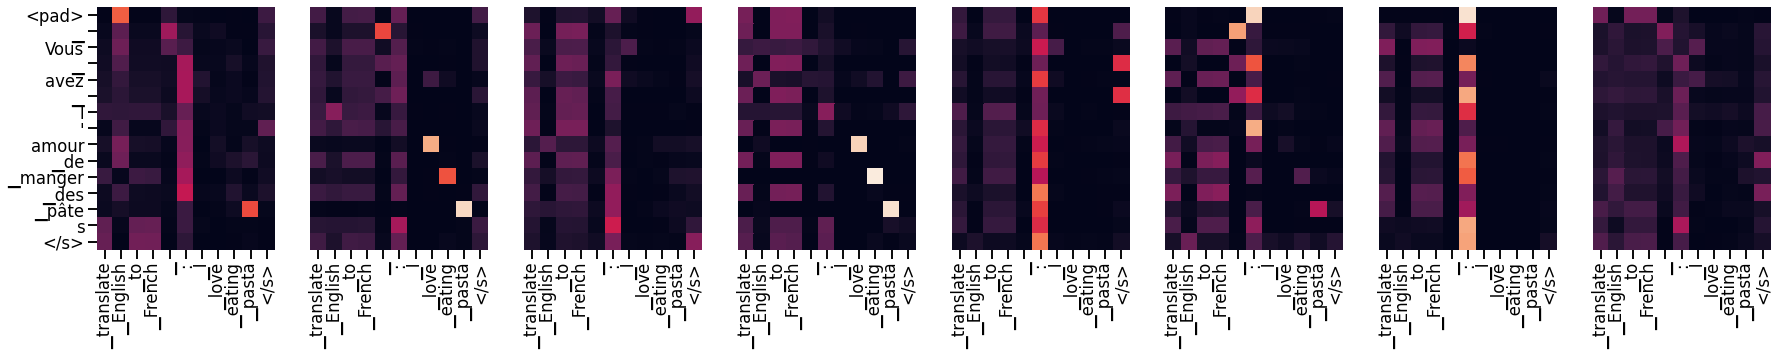

Encoder Layer 2


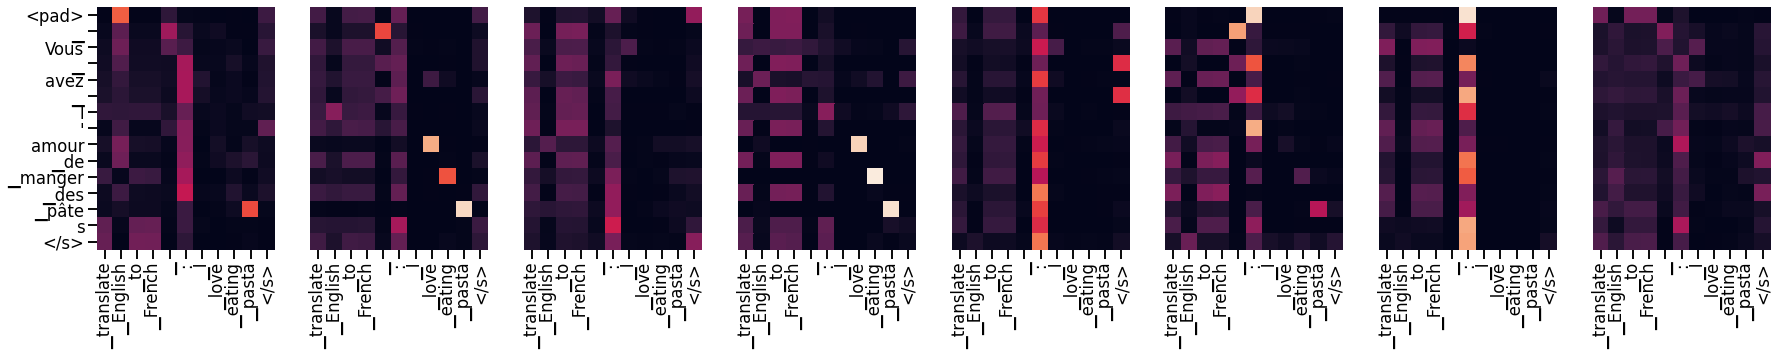

Encoder Layer 3


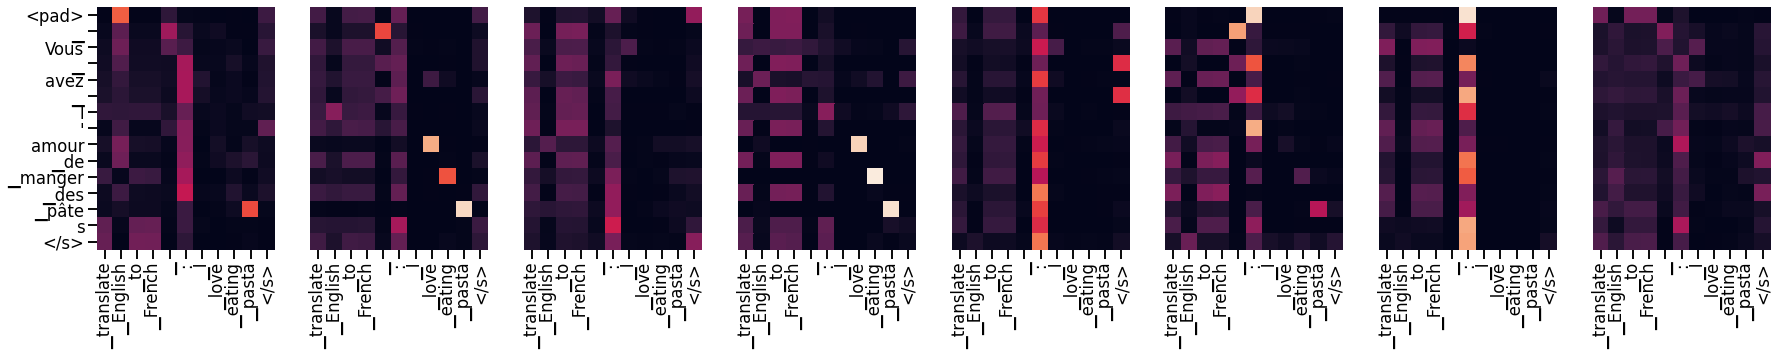

Encoder Layer 4


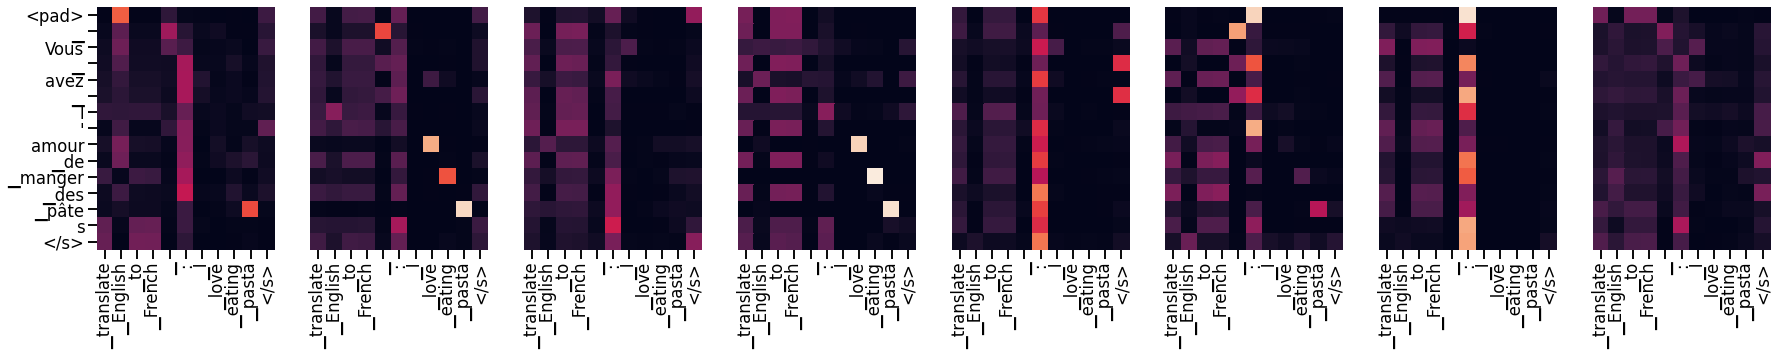

Encoder Layer 5


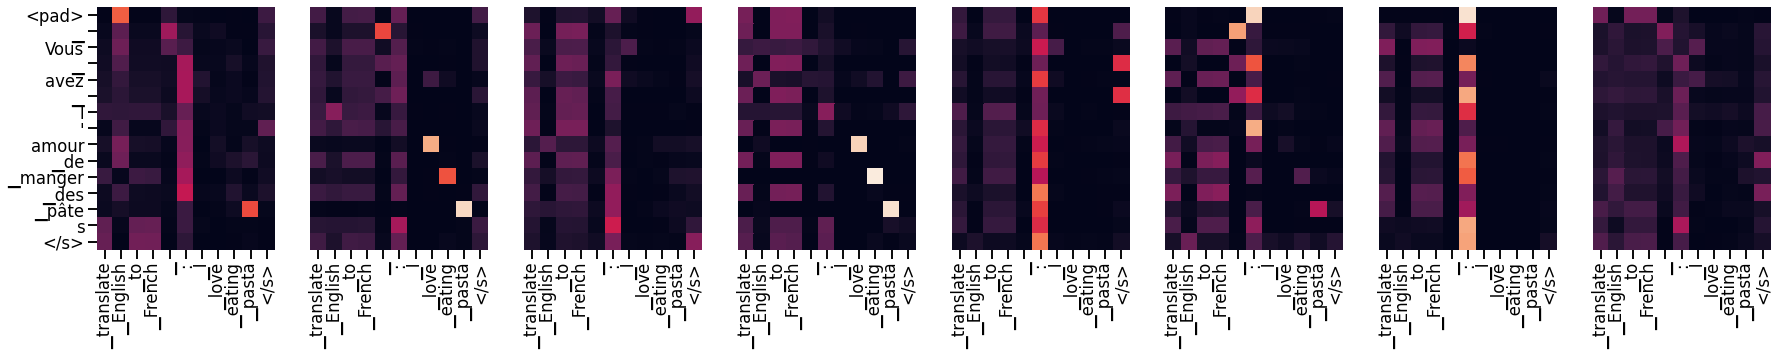

Encoder Layer 6


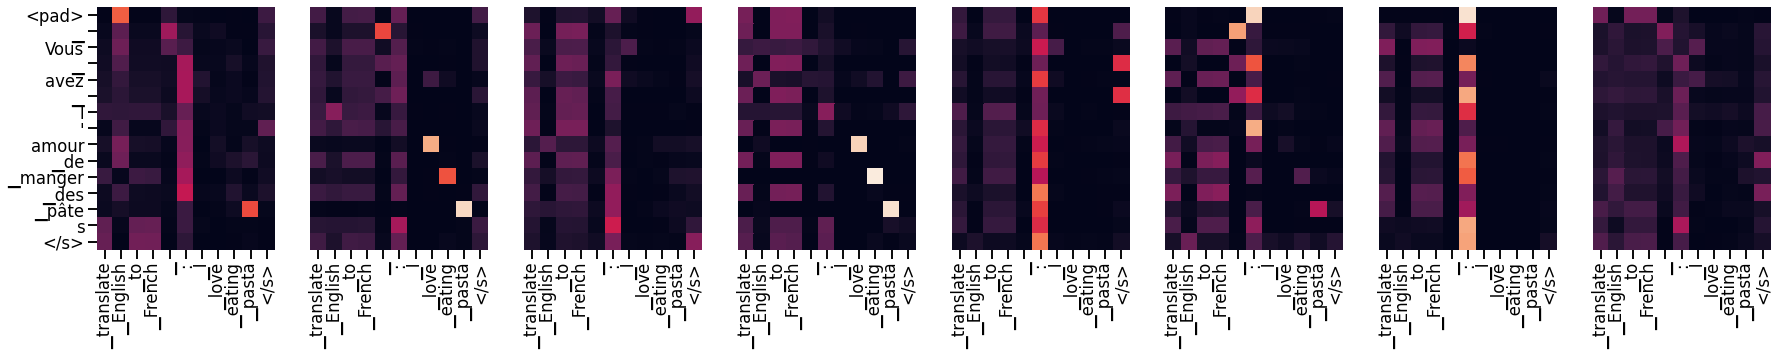

Encoder Layer 1


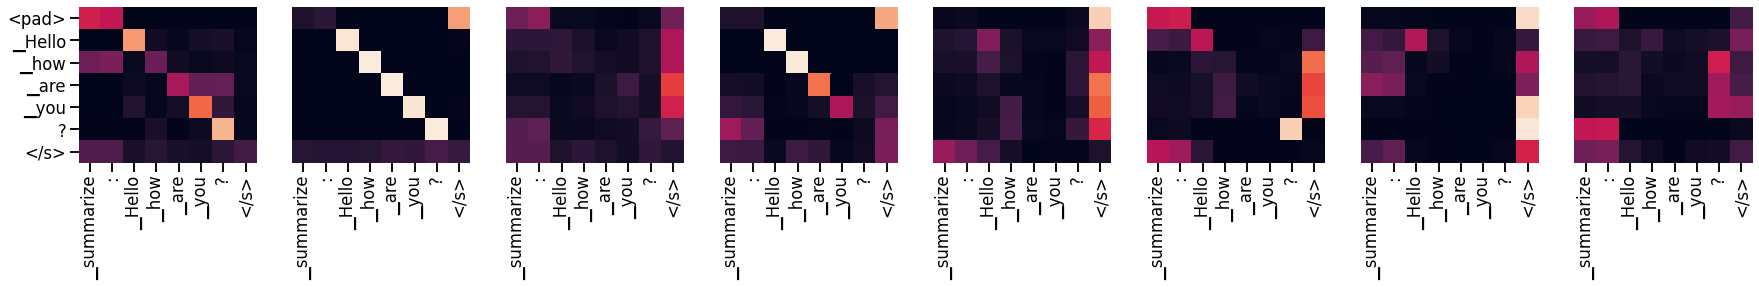

Encoder Layer 2


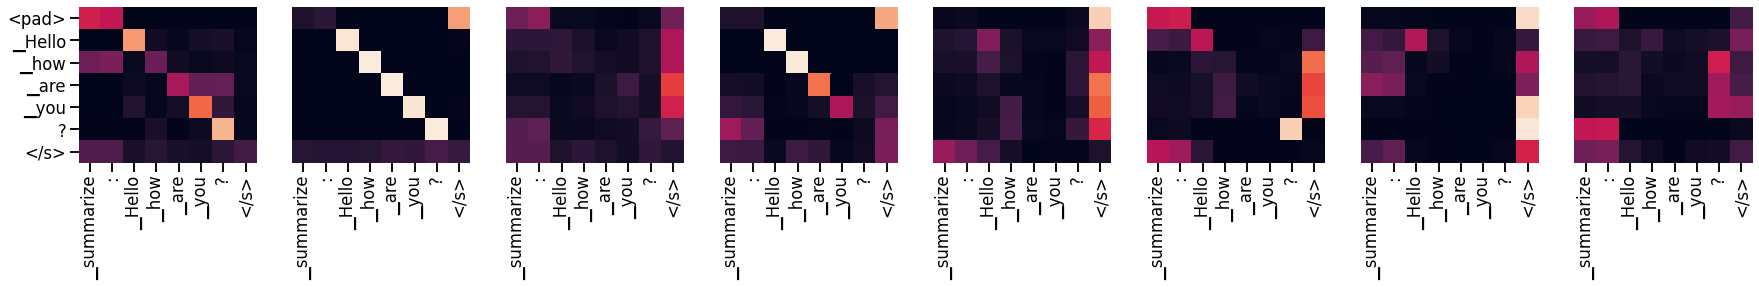

Encoder Layer 3


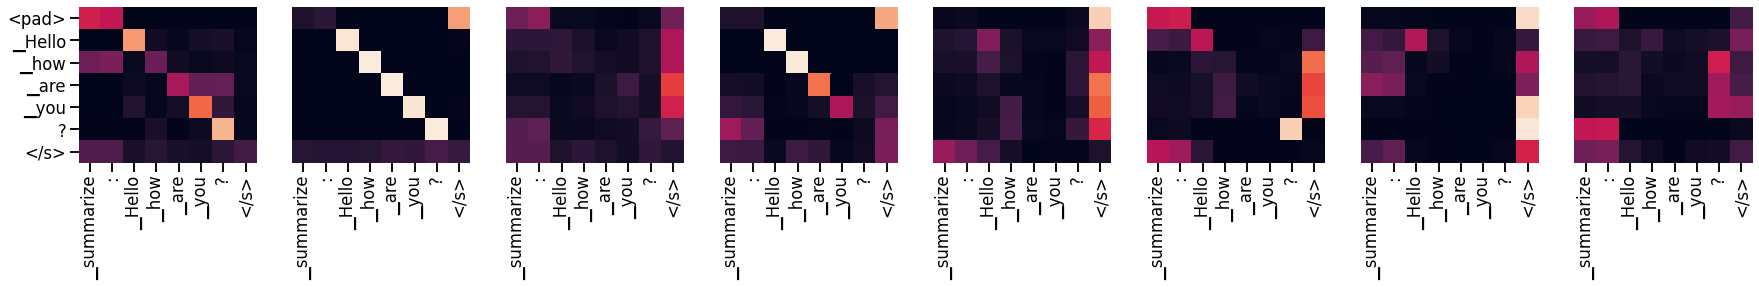

Encoder Layer 4


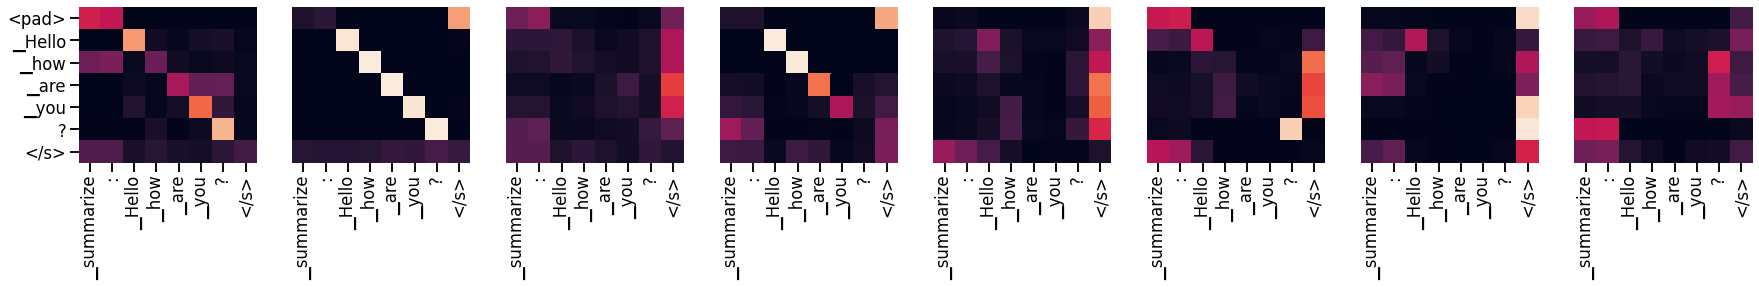

Encoder Layer 5


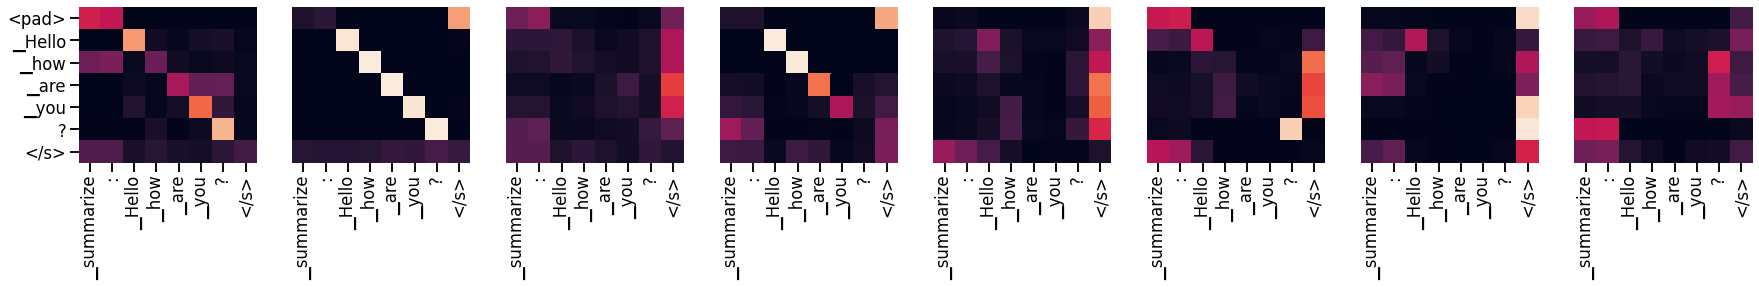

Encoder Layer 6


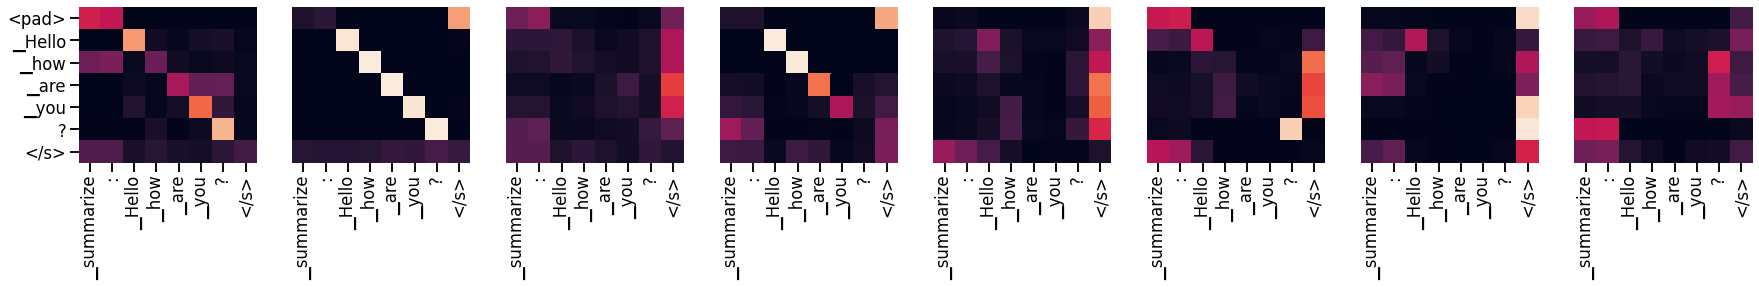

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
seaborn.set_context(context="talk")
%matplotlib inline


list_attention_translation=[]
inp_translation = get_words(input_encodings_translation['input_ids'])
trad_translation = get_words(model_output_translation)

list_attention_qa=[]
inp_qa = get_words(input_encodings_qa['input_ids'])
trad_qa = get_words(model_output_qa)

list_attention_sum=[]
inp_sum = get_words(input_encodings_sum['input_ids'])
trad_sum = get_words(model_output_sum)

############################################################
######## translation ######################################

for layer in range(6):
    nb_head_translation = (outputs_translation['cross_attentions'][0]).size()[1]
    fig, axs = plt.subplots(1,nb_head_translation, figsize=(30, 30))
    print("Encoder Layer", layer+1)
  
    for h in range(nb_head_translation):
        att_translation =outputs_translation['cross_attentions'][layer][0,h]
        attention_translation=att_translation.cpu().detach().numpy()
        list_attention_translation.append(attention_translation)
        draw(attention_translation, inp_translation, trad_translation if h ==0 else [], ax=axs[h])
    plt.show()

agg_translation = np.mean( np.array(list_attention_translation), axis=0 )


############################################################
######## q&a ######################################

for layer in range(6):
    nb_head_qa = (outputs_qa['cross_attentions'][0]).size()[1]
    #fig, axs = plt.subplots(1,nb_head_qa, figsize=(30, 30))
    #print("Encoder Layer", layer+1)
  
    for h in range(nb_head_qa):
        att_qa =outputs_qa['cross_attentions'][layer][0,h]
        attention_qa=att_qa.cpu().detach().numpy()
        list_attention_qa.append(attention_qa)
        #draw(attention_qa, inp_qa, trad_qa if h ==0 else [], ax=axs[h])
    #plt.show()

agg_qa = np.mean( np.array(list_attention_qa), axis=0 )


############################################################
######## summerization ######################################

for layer in range(6):
    nb_head_sum = (outputs_sum['cross_attentions'][0]).size()[1]
    fig, axs = plt.subplots(1,nb_head_sum, figsize=(30, 30))
    print("Encoder Layer", layer+1)
  
    for h in range(nb_head_sum):
        att_sum =outputs_sum['cross_attentions'][layer][0,h]
        attention_sum=att_sum.cpu().detach().numpy()
        list_attention_sum.append(attention_sum)
        draw(attention_sum, inp_sum, trad_sum if h ==0 else [], ax=axs[h])
    plt.show()

agg_sum = np.mean( np.array(list_attention_sum), axis=0 )

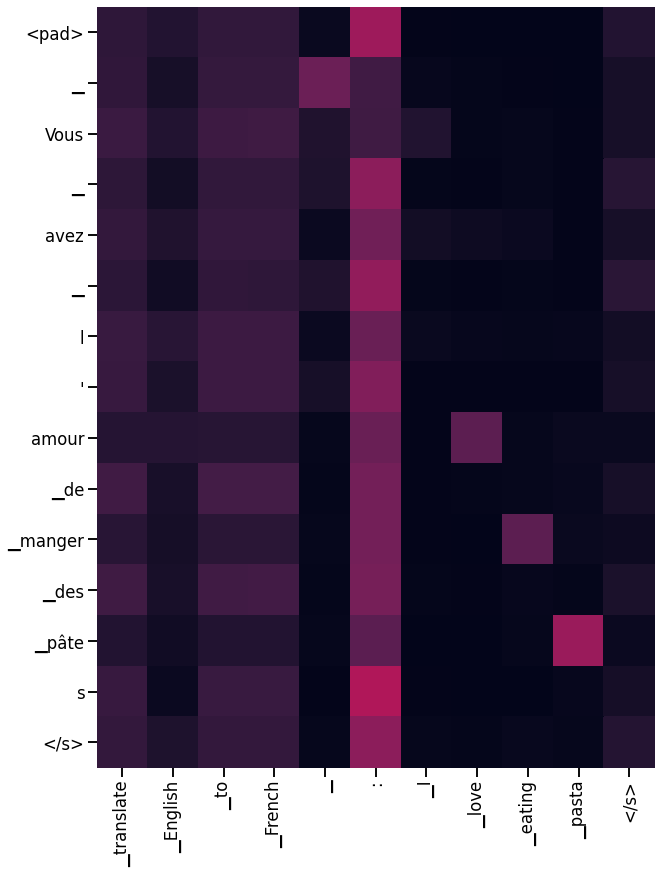

In [ ]:
#Mean of the attention (on all layers/head) for the translation task

f, ax = plt.subplots(figsize=(10, 100))
ax = seaborn.heatmap(agg_translation, xticklabels=inp_translation, square=True, yticklabels=trad_translation, vmin=0.0, vmax=1.0, 
                    cbar=False)



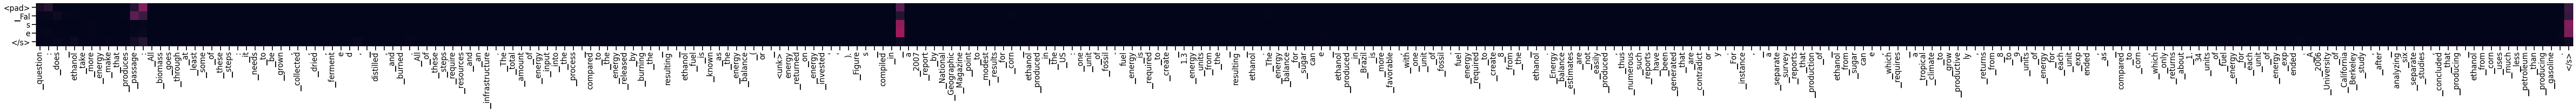

In [ ]:
#Mean of the attention (on all layers/head) for the q&a task
f, ax = plt.subplots(figsize=(100, 100))
ax = seaborn.heatmap(agg_qa, xticklabels=inp_qa, square=True, yticklabels=trad_qa, vmin=0.0, vmax=1.0, 
                    cbar=False)

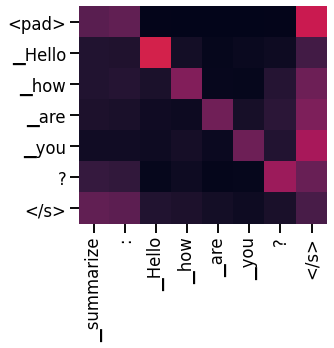

In [ ]:
#Mean of the attention (on all layers/head) for the summerization task

seaborn.heatmap(agg_sum, xticklabels=inp_sum, square=True, yticklabels=trad_sum, vmin=0.0, vmax=1.0, 
                    cbar=False)

Report : 

Regarding the aggregated cross attention matrices : we can notice that the 'task' ('summerize : ...', 'question : ... passage : ...', and 'translate English to French' ) take the attention on the whole result. This seam logical since the whole result depend on the task. However, it seems that for the summarization only the opening and closing tokens focus on the ‘task’ while for the two other tasks the whole answer focus almost equality on the task. 
It is also clear for the summarization and the translation, each word of the answer focus on the part (or the world) which corresponds the most. It is less obvious for the q&a with a big context and question.

Regarding the display layer by layer and head by head : we can notice that each head seems to have a special task, and this task seem to change through the layer. Also, those tasks doesn’t seem to be the same for different task. If we compare translation and summarization (it is comparable since the two models are run on basic sentences and are pretrained from the same database) , it seems that this layer1/head1 try to ‘understand’ the task, in the case of summarization (the attention is on the tokens linked to ‘summarize : …’, while it tries to focus on the actual task for translation (‘the attention of each word of the answer is focused on each translated word). 

We could then expect that the attention layer by layer and head by head strongly depends on the task itself, even if the aggregated matrix seems to follow common patterns. 


### 2.2 Implement Attention Matrix Aggregation

In [ ]:
list_conf_translation=[]
list_conf_qa=[]
list_conf_sum=[]


############################################################
######## translation ######################################

for layer in range(6):
    nb_head_translation = (outputs_translation['cross_attentions'][0]).size()[1]
    list_head_trans = []
    for h in range(nb_head_translation):
        att_translation =outputs_translation['cross_attentions'][layer][0,h]
        att_translation_wo_eos = att_translation[:,:-1]

        confidence_score_transl=np.mean(att_translation_wo_eos.cpu().detach().numpy())
        
        list_head_trans.append(confidence_score_transl)
    list_conf_translation.append(list_head_trans)

sns.heatmap(list_conf_translation)
#plt.matshow(list_conf_total)
plt.title('Confidence score Translation')       
plt.show()


############################################################
######## q&a ######################################

for layer in range(6):
    nb_head_qa = (outputs_qa['cross_attentions'][0]).size()[1]
    list_head_qa = []
    for h in range(nb_head_qa):
        att_qa =outputs_qa['cross_attentions'][layer][0,h]
        att_qa_wo_eos = att_qa[:,:-1]

        confidence_score_qa=np.mean(att_qa_wo_eos.cpu().detach().numpy())
        
        list_head_qa.append(confidence_score_qa)
        
    list_conf_qa.append(list_head_qa)

sns.heatmap(list_conf_qa)
#plt.matshow(list_conf_total)
plt.title('Confidence score Q&A')       
plt.show()


############################################################
######## summerization ######################################

for layer in range(6):
    nb_head_sum = (outputs_sum['cross_attentions'][0]).size()[1]
    list_head_sum = []
    for h in range(nb_head_sum):
        att_sum =outputs_sum['cross_attentions'][layer][0,h]
        att_sum_wo_eos = att_sum[:,:-1]

        confidence_score_sum=np.mean(att_sum_wo_eos.cpu().detach().numpy())
        
        list_head_sum.append(confidence_score_sum)
        
    list_conf_sum.append(list_head_sum)

sns.heatmap(list_conf_sum)
#plt.matshow(list_conf_total)
plt.title('Confidence score summarization')       
plt.show()




**Report :**
In those plot we can see the heat map of confidence score of diferent layers (vertical axis) and heads (horizontal axi). We can see that as observed previously, the attention take different importance depending on the task : attention less important for Q&A than for MT and summarization.
We can then identify the important head in the transformers, it correspond to head that had maybe specific tasks in the generation of sentence. In translation we can imagine that some heads are responsible to catch the syntactic structure of the sentences. This visualisation methods allows us to better understand the process below the structure of transformers.